Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
228                               NaN                 Vietnam  16.000000   
229                               NaN                  Zambia -15.416700   
230                               NaN                Zimbabwe -20.000000   
231                  Diamond Princess                  Canada   0.000000   
232                               NaN                Dominica  15.415000   
233                               NaN                 Grenada  12.116500   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.91620

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
230                               NaN                 Vietnam  16.000000   
231                               NaN                  Zambia -15.416700   
232                               NaN                Zimbabwe -20.000000   
233                  Diamond Princess                  Canada   0.000000   
234                               NaN                Dominica  15.415000   
235                               NaN                 Grenada  12.116500   
236                               NaN              Mozambique -18.665695   
237                               NaN                   Syria  34.802075   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.91620

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/27/20  \
185        0        0        0        0        0        0  ...       16   
186        0        0        0        0        0        0  ...       76   
187        0        0        0        0        0        0  ...        0   
188        0        0        0        0        0        0  ...       26   
189        0        0        0        0        0        0  ...        4   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       21   
194        0        0        0        0        0        0  ...        3   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20   Population   \
185       18       22       31       33      43      57      71    37,980,000   
186      100      119      140      160     187     209     246    10,290,000   
187        1        1        1        2       2       3       3           NaN   
188       37       43       65       82      92     115     133    19,530,000   
189        4        8        9       17      24      30      34   144,500,000   
190        0        0        0        0       0       0       0           NaN   
191        0        0        0        0       0       0       0           NaN   
192        0        0        0        0       0       0       0           NaN   
193       22       22       25       26      26      30      30           NaN   
194        4        8        8       10      16      21      25           NaN   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 79 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/27/20  3/28/20  3/29/20  \
175        0        0        0        0  ...       23       23       23   
176        0        0        0        0  ...       23       29       29   
177        0        0        0        0  ...        2        2        4   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...        1        1        1   
180        0        0        0        0  ...       16       16       16   
181        0        0        0        0  ...       31       35       42   
182        0        0        0        0  ...        7        7        7   
183        0        0        0        0  ...       43       43       43   
184        0        0        0        0  ...       43       45       48   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20   Population   \
175       29       34      34      57      57     4,636,000   
176       76       76      94     125     126   197,000,000   
177        4        9       9       9      10           NaN   
178        0        0       0       0       0           NaN   
179        1        1       1       2       6           NaN   
180       53      394     394     537     537           NaN   
181       42       49      50      51      52   104,900,000   
182        7        7      47      56      56    37,980,000   
183       43       43      43      68      68    10,290,000   
184       51       62      71      72      93           NaN   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 79 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/27/20  \
185        0        0        0        0        0        0  ...     1389   
186        0        0        0        0        0        0  ...     4268   
187        0        0        0        0        0        0  ...      562   
188        0        0        0        0        0        0  ...     1292   
189        0        0        0        0        0        0  ...     1036   
190        0        0        0        0        0        0  ...       54   
191        0        0        0        0        0        0  ...        3   
192        0        0        0        0        0        0  ...        1   
193        0        0        0        0        0        0  ...      223   
194        0        0        0        0        0        0  ...     1104   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20   Population   \
185     1638     1862     2055     2311    2554    2946    3383    37,980,000   
186     5170     5962     6408     7443    8251    9034    9886    10,290,000   
187      590      634      693      781     835     949    1075           NaN   
188     1452     1815     2109     2245    2460    2738    3183    19,530,000   
189     1264     1534     1836     2337    2777    3548    4149   144,500,000   
190       60       70       70       75      82      84      89           NaN   
191        3        9        9       13      13      13      13           NaN   
192        1        1        1        1       1       2       3           NaN   
193      224      224      230      236     236     245     245           NaN   
194     1203     1299     1453     1563    1720    1885    2039           NaN   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 79 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/27/20  3/28/20  3/29/20  \
220        0        0        0        0  ...        8        8        8   
221        0        0        0        0  ...       88       97      108   
222        0        0        0        0  ...       55       56       65   
223        0        0        0        0  ...       29       32       42   
224        0        0        0        0  ...        5        5        5   
225        0        0        0        0  ...    14543    17089    19522   
226        0        0        0        0  ...      238      274      304   
227        2        2        5        5  ...   101657   121478   140886   
228        0        0        0        0  ...       88      104      144   
229        0        0        0        0  ...      107      119      119   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20   Population   \
220       12       14      22      28      28           NaN   
221      141      141     172     193     232           NaN   
222       69       69      81      88      95           NaN   
223       49       60      68      95     114           NaN   
224        5        5       5       5       6           NaN   
225    22141    25150   29474   33718   38168    66,440,000   
226      310      338     338     350     369           NaN   
227   161807   188172  213372  243453  275586   327,200,000   
228      149      172     181     205     227           NaN   
229      135      135     143     146     153           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 79 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

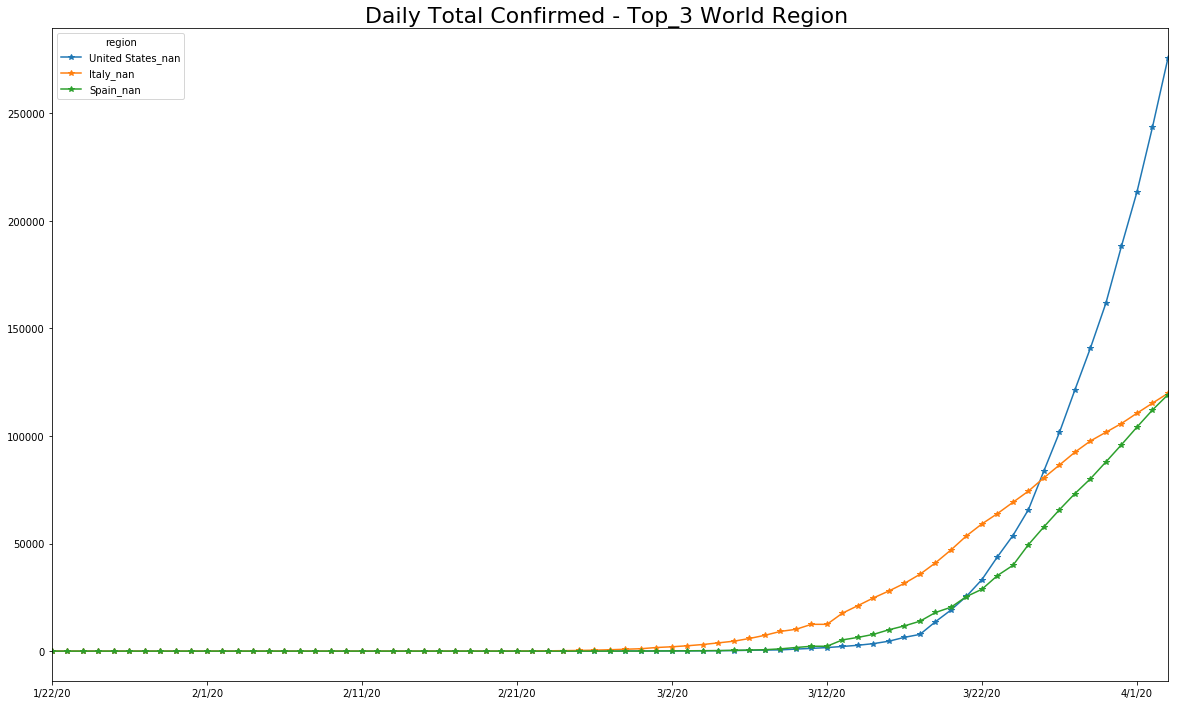

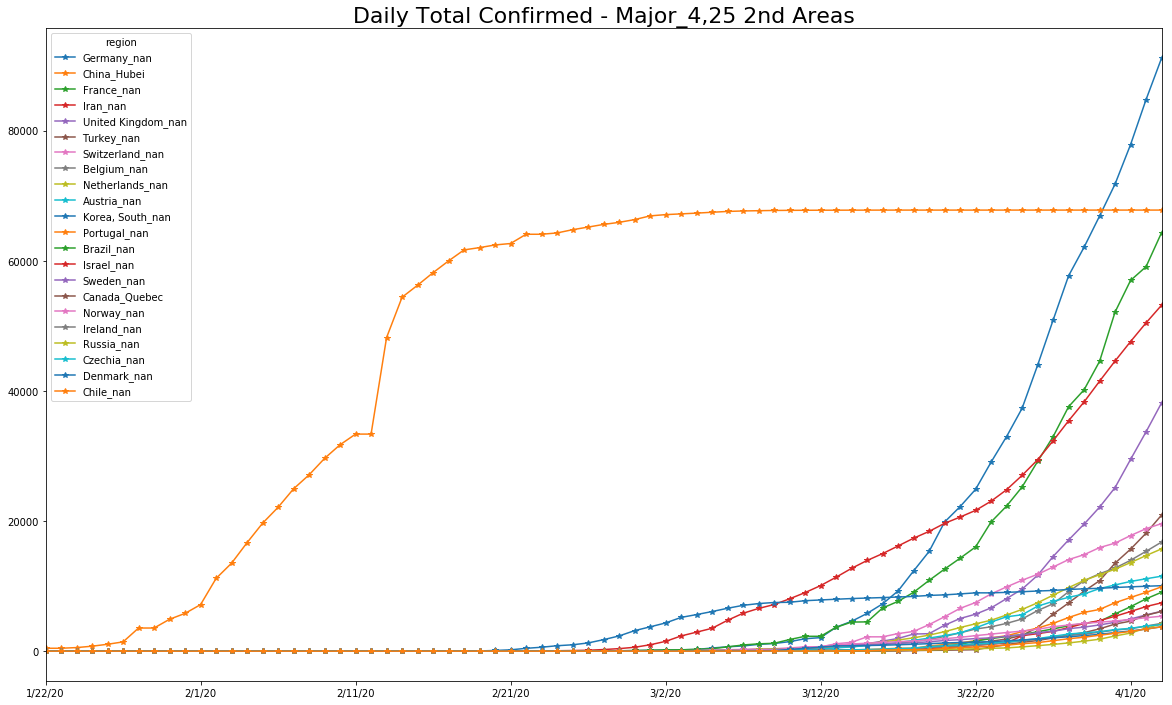

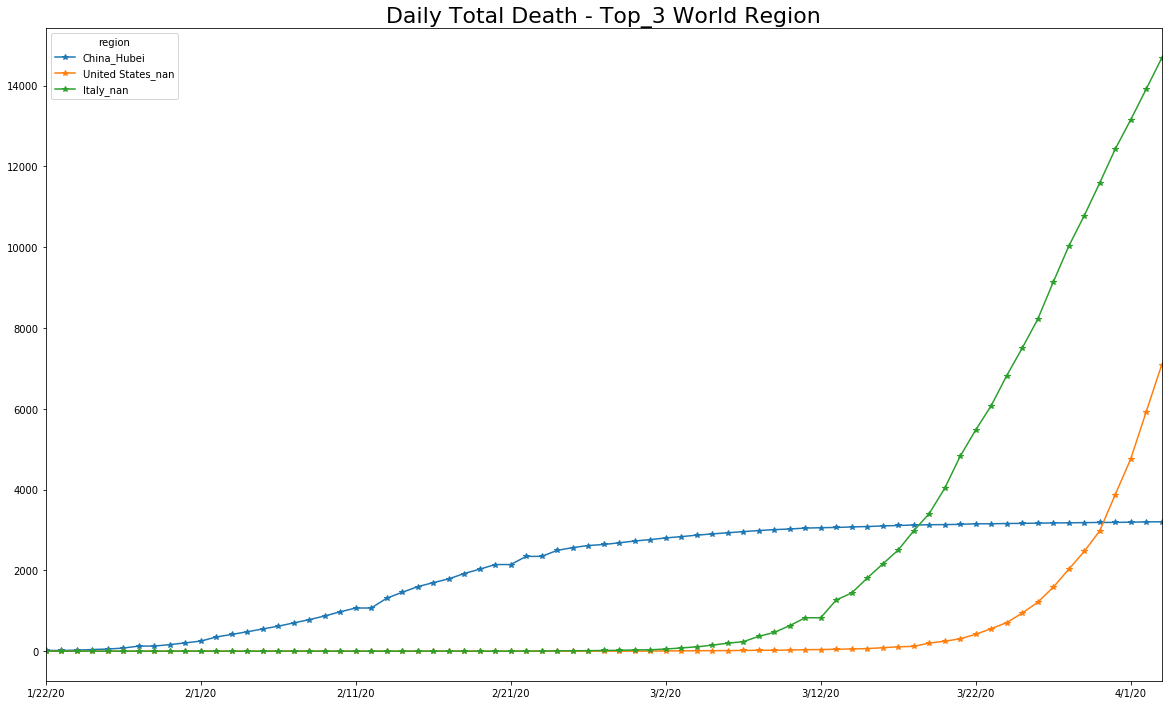

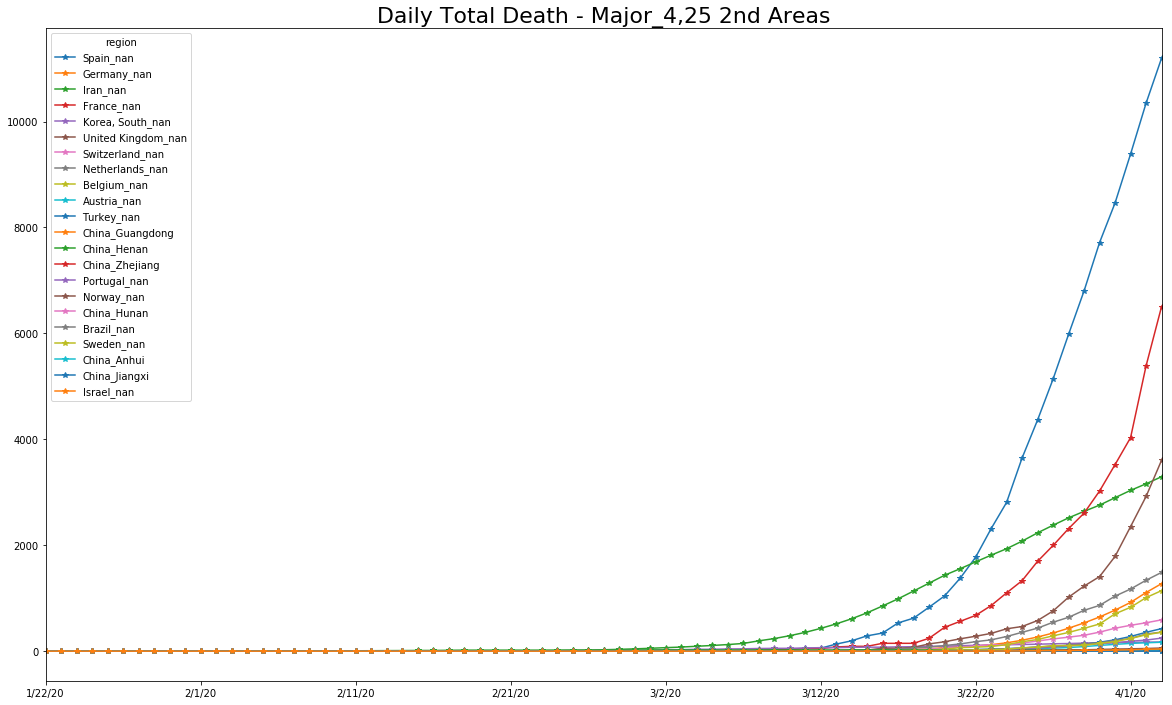

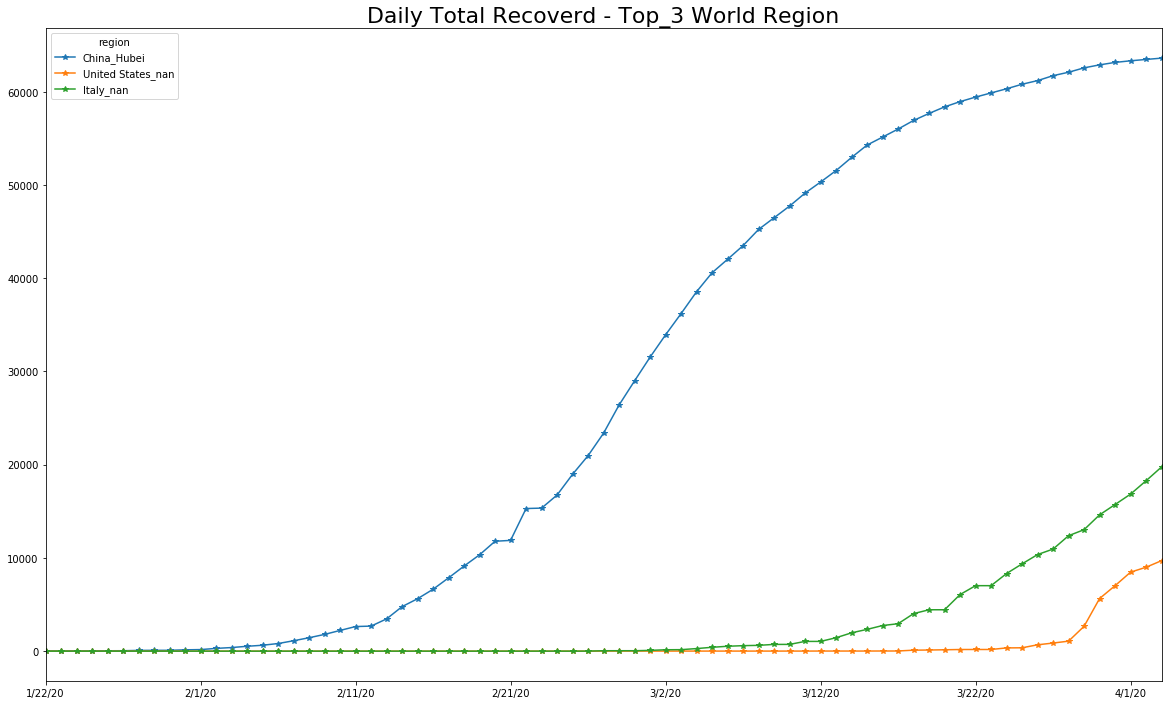

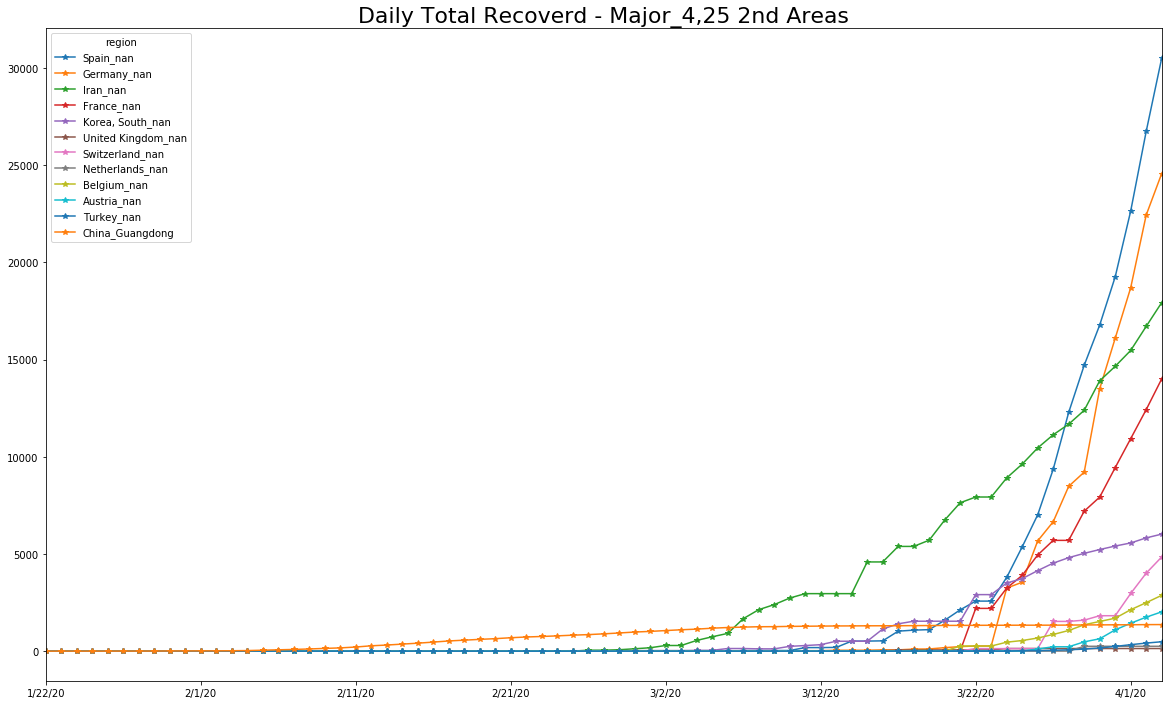

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [13]:

#!pip install pyweatherbit

In [14]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [15]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-04-02'
offset_days=0 # is h! #-1 to start yesterday pick today# API free-tier just picks one per api call!
max_days=2

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_train_list:
            continue
        if confirmed.iloc[i,vpos] in my_train_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

date                     region   min   max
0   2020/04/03  Australia_New South Wales  20.6  24.4
1   2020/04/03                Belgium_nan  -1.1  11.1
2   2020/04/03             Canada_Ontario  -7.8   6.3
3   2020/04/03              China_Beijing   2.0  21.0
4   2020/04/03            China_Guangdong  14.0  18.7
5   2020/04/03            China_Hong Kong  16.7  18.1
6   2020/04/03                China_Hubei  11.0  17.0
7   2020/04/03                China_Macau  18.0  21.0
8   2020/04/03             China_Shanghai   9.8  19.9
9   2020/04/03                Finland_nan -10.6  -1.1
10  2020/04/03                Finland_nan -10.6  -1.1
11  2020/04/03                 France_nan  -0.7  11.6
12  2020/04/03                Germany_nan  -4.0  13.0
13  2020/04/03                  India_nan  22.0  37.0
14  2020/04/03                   Iran_nan   7.0  17.8
15  2020/04/03                   Iran_nan   7.0  17.8
16  2020/04/03                  Italy_nan  -0.7  10.0
17  2020/04/03                  Japan_nan  -0.2   9.2
18  2020/04/03           Korea, South_nan   0.0  17.0
19  2020/04/03               Malaysia_nan  23.7  31.0
20  2020/04/03            Netherlands_nan   6.7  13.3
21  2020/04/03                 Norway_nan  -2.2  -2.2
22  2020/04/03            Philippines_nan  26.1  31.7
23  2020/04/03                 Poland_nan  -1.1   8.9
24  2020/04/03               Portugal_nan   5.4  17.6
25  2020/04/03                 Russia_nan  -4.0  17.0
26  2020/04/03              Singapore_nan  25.5  35.0
27  2020/04/03                  Spain_nan   3.5  16.3
28  2020/04/03                 Sweden_nan   0.6   7.2
29  2020/04/03            Switzerland_nan   1.3  10.5
..         ...                        ...   ...   ...
40  2020/04/04            China_Hong Kong  17.2  19.2
41  2020/04/04                China_Hubei  10.8  19.0
42  2020/04/04                China_Macau  19.0  21.4
43  2020/04/04             China_Shanghai  11.8  19.8
44  2020/04/04                Finland_nan  -3.3  -1.1
45  2020/04/04                Finland_nan  -3.3  -1.1
46  2020/04/04                 France_nan   0.6  11.8
47  2020/04/04                Germany_nan   3.0   8.0
48  2020/04/04                  India_nan  23.0  36.0
49  2020/04/04                   Iran_nan   7.0  18.0
50  2020/04/04                   Iran_nan   7.0  18.0
51  2020/04/04                  Italy_nan   2.1  12.5
52  2020/04/04                  Japan_nan  -2.0  13.9
53  2020/04/04           Korea, South_nan   0.0  17.0
54  2020/04/04               Malaysia_nan  23.9  33.0
55  2020/04/04            Netherlands_nan   8.9  12.8
56  2020/04/04                 Norway_nan  -2.2  -2.2
57  2020/04/04            Philippines_nan  25.6  30.6
58  2020/04/04                 Poland_nan   1.7  10.6
59  2020/04/04               Portugal_nan   7.2  21.1
60  2020/04/04                 Russia_nan   1.0  14.0
61  2020/04/04              Singapore_nan  25.5  33.0
62  2020/04/04                  Spain_nan   5.8  17.5
63  2020/04/04                 Sweden_nan  -1.1   3.9
64  2020/04/04            Switzerland_nan   2.0   8.8
65  2020/04/04                Taiwan*_nan  14.4  19.0
66  2020/04/04                 Turkey_nan   3.1   7.7
67  2020/04/04         United Kingdom_nan   1.1   6.7
68  2020/04/04          United States_nan   0.3  17.9
69  2020/04/04                Vietnam_nan  25.2  32.0

[70 rows x 4 columns]

In [16]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [17]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 16/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[25:]
ts_d=ts_d[25:]
ts_rec=ts_rec[25:]

In [18]:
ts[:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/16/20                0            0            0            0           0   
2/17/20                0            0            0            0           0   
2/18/20                0            0            0            0           0   
2/19/20                0            0            0            0           0   
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   
2/23/20                0            0            0            0           0   
2/24/20                1            0            0            0           0   
2/25/20                1            0            1            0           0   
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   
2/29/20                1            0            1            0           0   
3/1/20                 1            0            1            0           0   
3/2/20                 1            0            3            1           0   
3/3/20                 1            0            5            1           0   
3/4/20                 1            0           12            1           0   
3/5/20                 1            0           12            1           0   
3/6/20                 1            0           17            1           0   
3/7/20                 1            0           17            1           0   
3/8/20                 4            0           19            1           0   
3/9/20                 4            2           20            1           0   
3/10/20                5           10           20            1           0   
3/11/20                7           12           20            1           0   
3/12/20                7           23           24            1           0   
3/13/20                7           33           26            1           0   
3/14/20               11           38           37            1           0   
3/15/20               16           42           48            1           0   
3/16/20               21           51           54            2           0   
3/17/20               22           55           60           39           0   
3/18/20               22           59           74           39           0   
3/19/20               22           64           87           53           0   
3/20/20               24           70           90           75           1   
3/21/20               24           76          139           88           2   
3/22/20               40           89          201          113           2   
3/23/20               40          104          230          133           3   
3/24/20               74          123          264          164           3   
3/25/20               84          146          302          188           3   
3/26/20               94          174          367          224           4   
3/27/20              110          186          409          267           4   
3/28/20              110          197          454          308           5   
3/29/20              120          212          511          334           7   
3/30/20              170          223          584          370           7   
3/31/20              174          243          716          376           7   
4/1/20               237          259          847          390           8   
4/2/20               273          277          986          428           8   
4/3/20               281          304         1171          439           8   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/16/20                        0              0            0   


In [19]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [20]:
#!pip install rpy2


In [21]:
import rpy2
%load_ext rpy2.ipython

In [22]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [23]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [24]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [25]:
p=%R pred_all

In [26]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

In [27]:
temp[:]

date           region  confirmed     Y          X      X2
0     2020-02-16  Afghanistan_nan          0   0.0   0.000000  0.0000
1     2020-02-17  Afghanistan_nan          0   0.0   0.000000  0.0000
2     2020-02-18  Afghanistan_nan          0   0.0   0.000000  0.0000
3     2020-02-19  Afghanistan_nan          0   0.0   0.000000  0.0000
4     2020-02-20  Afghanistan_nan          0   0.0   0.000000  0.0000
5     2020-02-21  Afghanistan_nan          0   0.0   0.000000  0.0000
6     2020-02-22  Afghanistan_nan          0   0.0   0.000000  0.0000
7     2020-02-23  Afghanistan_nan          0   0.0   0.000000  0.0000
8     2020-02-24  Afghanistan_nan          1   1.0   0.000000  0.0000
9     2020-02-25  Afghanistan_nan          1   1.0   0.623856  0.3281
10    2020-02-26  Afghanistan_nan          1   1.0   1.004242  0.4512
11    2020-02-27  Afghanistan_nan          1   1.0   1.204645  0.4498
12    2020-02-28  Afghanistan_nan          1   1.0   1.280703  0.3826
13    2020-02-29  Afghanistan_nan          1   1.0   1.279580  0.2905
14    2020-03-01  Afghanistan_nan          1   1.0   1.237705  0.1987
15    2020-03-02  Afghanistan_nan          1   1.0   1.180425  0.1208
16    2020-03-03  Afghanistan_nan          1   1.0   1.123434  0.0616
17    2020-03-04  Afghanistan_nan          1   1.0   1.075000  0.0211
18    2020-03-05  Afghanistan_nan          1   1.0   1.038243 -0.0034
19    2020-03-06  Afghanistan_nan          1   1.0   1.013101 -0.0160
20    2020-03-07  Afghanistan_nan          1   1.0   0.997828 -0.0203
21    2020-03-08  Afghanistan_nan          4   4.0   0.990045 -0.0196
22    2020-03-09  Afghanistan_nan          4   4.0   2.838096  0.9671
23    2020-03-10  Afghanistan_nan          5   5.0   3.990064  1.3479
24    2020-03-11  Afghanistan_nan          7   7.0   5.219671  1.6790
25    2020-03-12  Afghanistan_nan          7   7.0   7.073508  2.2626
26    2020-03-13  Afghanistan_nan          7   7.0   8.046315  2.2385
27    2020-03-14  Afghanistan_nan         11  11.0   8.408152  1.8955
28    2020-03-15  Afghanistan_nan         16  16.0  10.860045  2.7451
29    2020-03-16  Afghanistan_nan         21  21.0  15.266187  4.4299
...          ...              ...        ...   ...        ...     ...
12612 2020-03-06     Zimbabwe_nan          0   0.0   0.000000  0.0000
12613 2020-03-07     Zimbabwe_nan          0   0.0   0.000000  0.0000
12614 2020-03-08     Zimbabwe_nan          0   0.0   0.000000  0.0000
12615 2020-03-09     Zimbabwe_nan          0   0.0   0.000000  0.0000
12616 2020-03-10     Zimbabwe_nan          0   0.0   0.000000  0.0000
12617 2020-03-11     Zimbabwe_nan          0   0.0   0.000000  0.0000
12618 2020-03-12     Zimbabwe_nan          0   0.0   0.000000  0.0000
12619 2020-03-13     Zimbabwe_nan          0   0.0   0.000000  0.0000
12620 2020-03-14     Zimbabwe_nan          0   0.0   0.000000  0.0000
12621 2020-03-15     Zimbabwe_nan          0   0.0   0.000000  0.0000
12622 2020-03-16     Zimbabwe_nan          0   0.0   0.000000  0.0000
12623 2020-03-17     Zimbabwe_nan          0   0.0   0.000000  0.0000
12624 2020-03-18     Zimbabwe_nan          0   0.0   0.000000  0.0000
12625 2020-03-19     Zimbabwe_nan          0   0.0   0.000000  0.0000
12626 2020-03-20     Zimbabwe_nan          1   1.0   0.000000  0.0000
12627 2020-03-21     Zimbabwe_nan          3   3.0   0.616903  0.3278
12628 2020-03-22     Zimbabwe_nan          3   3.0   2.234549  1.1089
12629 2020-03-23     Zimbabwe_nan          3   3.0   3.205785  1.3599
12630 2020-03-24     Zimbabwe_nan          3   3.0   3.690772  1.2924
12631 2020-03-25     Zimbabwe_nan          3   3.0   3.846214  1.0660
12632 2020-03-26     Zimbabwe_nan          3   3.0   3.803870  0.7886
12633 2020-03-27     Zimbabwe_nan          5   5.0   3.662827  0.5251
12634 2020-03-28     Zimbabwe_nan          7   7.0   4.724024  0.9634
12635 2020-03-29     Zimbabwe_nan          7   7.0   6.561613  1.7094
12636 2020-03-30     Zimbabwe_nan          7   7.0   7.601308  1.8531
12637 2020-03-31     Z

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(10)

date       region   min   max
5540 2020-03-09  Vietnam_nan  23.4  29.6
5541 2020-03-10  Vietnam_nan  22.1  26.1
5542 2020-03-11  Vietnam_nan  22.2  27.4
5543 2020-03-12  Vietnam_nan  23.6  28.2
5544 2020-03-13  Vietnam_nan  22.9  28.4
5545 2020-03-14  Vietnam_nan  24.6  31.0
5546 2020-04-01  Vietnam_nan  25.7  33.0
5547 2020-04-02  Vietnam_nan  25.3  30.0
5548 2020-04-03  Vietnam_nan  25.0  33.0
5549 2020-04-04  Vietnam_nan  25.2  32.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
9     2020-02-25  Afghanistan_nan          1             1             1   
10    2020-02-26  Afghanistan_nan          1             0             1   
11    2020-02-27  Afghanistan_nan          1             0             1   
12    2020-02-28  Afghanistan_nan          1             0             0   
13    2020-02-29  Afghanistan_nan          1             0             0   
14    2020-03-01  Afghanistan_nan          1             0             0   
15    2020-03-02  Afghanistan_nan          1             0             0   
16    2020-03-03  Afghanistan_nan          1             0             0   
17    2020-03-04  Afghanistan_nan          1             0             0   
18    2020-03-05  Afghanistan_nan          1             0             0   
19    2020-03-06  Afghanistan_nan          1             0             0   
20    2020-03-07  Afghanistan_nan          1             0             0   
21    2020-03-08  Afghanistan_nan          4             0             0   
22    2020-03-09  Afghanistan_nan          4             3             3   
23    2020-03-10  Afghanistan_nan          5             0             3   
24    2020-03-11  Afghanistan_nan          7             1             4   
25    2020-03-12  Afghanistan_nan          7             2             3   
26    2020-03-13  Afghanistan_nan          7             0             3   
27    2020-03-14  Afghanistan_nan         11             0             2   
28    2020-03-15  Afghanistan_nan         16             4             4   
29    2020-03-16  Afghanistan_nan         21             5             9   
30    2020-03-17  Afghanistan_nan         22             5            14   
31    2020-03-18  Afghanistan_nan         22             1            11   
32    2020-03-19  Afghanistan_nan         22             0             6   
33    2020-03-20  Afghanistan_nan         24             0             1   
34    2020-03-21  Afghanistan_nan         24             2             2   
35    2020-03-22  Afghanistan_nan         40             0             2   
36    2020-03-23  Afghanistan_nan         40            16            18   
37    2020-03-24  Afghanistan_nan         74             0            16   
38    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
12676 2020-03-21       Zambia_nan          2             0             2   
12677 2020-03-22       Zambia_nan          3             0             0   
12678 2020-03-23       Zambia_nan          3             1             1   
12679 2020-03-24       Zambia_nan          3             0             1   
12680 2020-03-25       Zambia_nan         12             0             1   
12681 2020-03-26       Zambia_nan         16             9             9   
12682 2020-03-27       Zambia_nan         22             4            13   
12683 2020-03-28       Zambia_nan         28             6            19   
12684 2020-03-29       Zambia_nan         29             6            16   
12685 2020-03-30       Zambia_nan         35             1            13   
12686 2020-03-31       Zambia_nan         35             6            13   
12687 2020-04-01       Zambia_nan         36             0             7   
12688 2020-04-02       Zambia_nan         39             1             7   
12689 2020-04-03       Zambia_nan         39             3             4   
12690 2020-04-04       Zambia_nan          0             0             4   
12725 2020-03-21     Zimbabwe_nan          3             1             1   
12726 2020-03-22     Zimbabwe_nan          3             2             3   
12727 2020-03-23     Zimbabwe_nan          3             0             3   
12728 2020-03-24     Zimbabwe_nan          3             0             2   
12729 2020-03-25     Zimbabwe_nan          3             0             0   
12730 2020-03-26     Zimbabwe_nan          3             0  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-02-16  Afghanistan_nan          0             0             0   
1     2020-02-17  Afghanistan_nan          0             0             0   
49    2020-02-16      Albania_nan          0             0             0   
50    2020-02-17      Albania_nan          0             0             0   
51    2020-02-18      Albania_nan          0             0             0   
52    2020-02-19      Albania_nan          0             0             0   
53    2020-02-20      Albania_nan          0             0             0   
54    2020-02-21      Albania_nan          0             0             0   
55    2020-02-22      Albania_nan          0             0             0   
56    2020-02-23      Albania_nan          0             0             0   
57    2020-02-24      Albania_nan          0             0             0   
58    2020-02-25      Albania_nan          0             0             0   
59    2020-02-26      Albania_nan          0             0             0   
60    2020-02-27      Albania_nan          0             0             0   
61    2020-02-28      Albania_nan          0             0             0   
62    2020-02-29      Albania_nan          0             0             0   
63    2020-03-01      Albania_nan          0             0             0   
64    2020-03-02      Albania_nan          0             0             0   
65    2020-03-03      Albania_nan          0             0             0   
66    2020-03-04      Albania_nan          0             0             0   
67    2020-03-05      Albania_nan          0             0             0   
68    2020-03-06      Albania_nan          0             0             0   
69    2020-03-07      Albania_nan          0             0             0   
70    2020-03-08      Albania_nan          0             0             0   
71    2020-03-09      Albania_nan          2             0             0   
72    2020-03-10      Albania_nan         10             2             2   
73    2020-03-11      Albania_nan         12             8            10   
74    2020-03-12      Albania_nan         23             2            12   
75    2020-03-13      Albania_nan         33            11            21   
76    2020-03-14      Albania_nan         38            10            23   
...          ...              ...        ...           ...           ...   
12710 2020-03-06     Zimbabwe_nan          0             0             0   
12711 2020-03-07     Zimbabwe_nan          0             0             0   
12712 2020-03-08     Zimbabwe_nan          0             0             0   
12713 2020-03-09     Zimbabwe_nan          0             0             0   
12714 2020-03-10     Zimbabwe_nan          0             0             0   
12715 2020-03-11     Zimbabwe_nan          0             0             0   
12716 2020-03-12     Zimbabwe_nan          0             0             0   
12717 2020-03-13     Zimbabwe_nan          0             0             0   
12718 2020-03-14     Zimbabwe_nan          0             0             0   
12719 2020-03-15     Zimbabwe_nan          0             0             0   
12720 2020-03-16     Zimbabwe_nan          0             0             0   
12721 2020-03-17     Zimbabwe_nan          0             0             0   
12722 2020-03-18     Zimbabwe_nan          0             0             0   
12723 2020-03-19     Zimbabwe_nan          0             0             0   
12724 2020-03-20     Zimbabwe_nan          1             0             0   
12725 2020-03-21     Zimbabwe_nan          3             1             1   
12726 2020-03-22     Zimbabwe_nan          3             2             3   
12727 2020-03-23     Zimbabwe_nan          3             0             3   
12728 2020-03-24     Zimbabwe_nan          3             0             2   
12729 2020-03-25     Zimbabwe_nan          3             0             0   
12730 2020-03-26     Zimbabwe_nan          3             0  

## Kalman 1 day Prediction with Evaluation

        region           mse          rmse          mae
148  Italy_nan  3.268379e+08  18078.659154  3618.166667


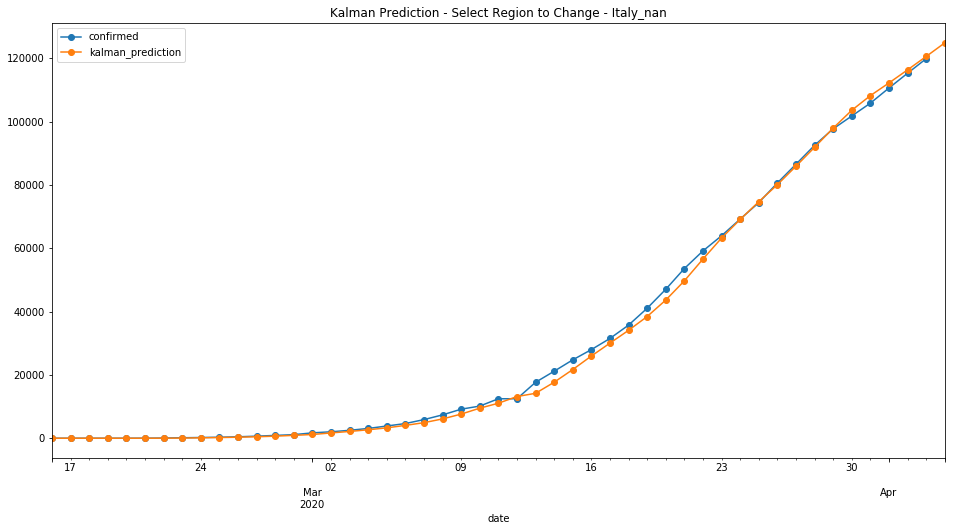

In [37]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
222  Spain_nan  3.427134e+08  18512.519362  3801.020833


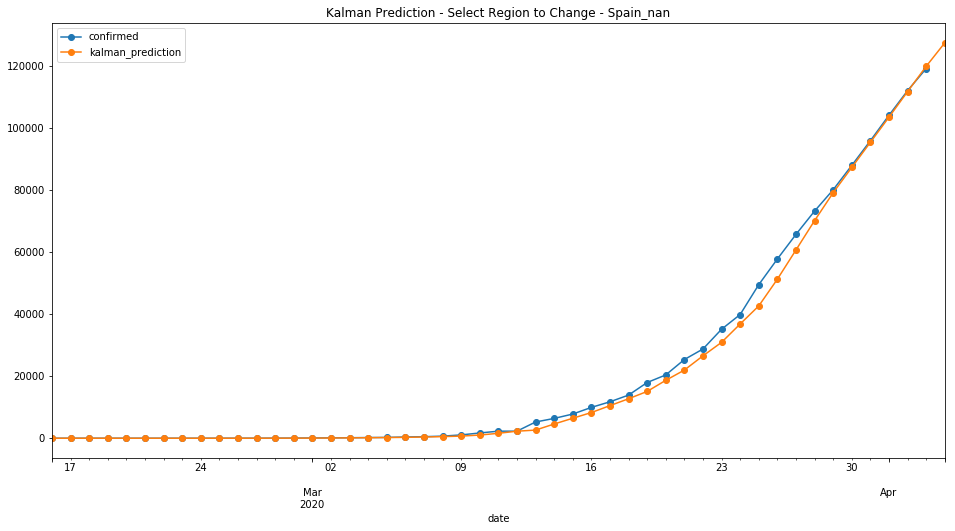

In [38]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse        mae
249  United Kingdom_nan  3.511592e+07  5925.868504  1367.4375


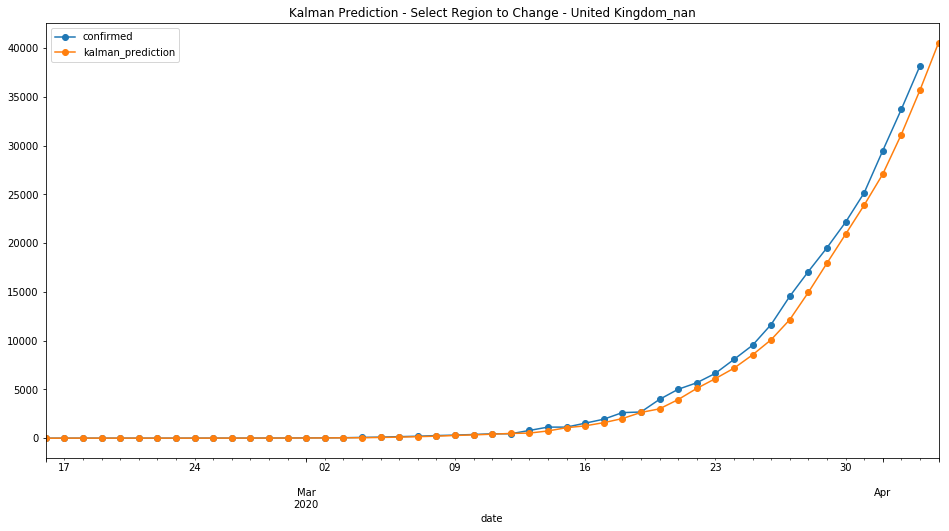

In [39]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse      mae
250  United States_nan  1.842111e+09  42919.815451  9871.75


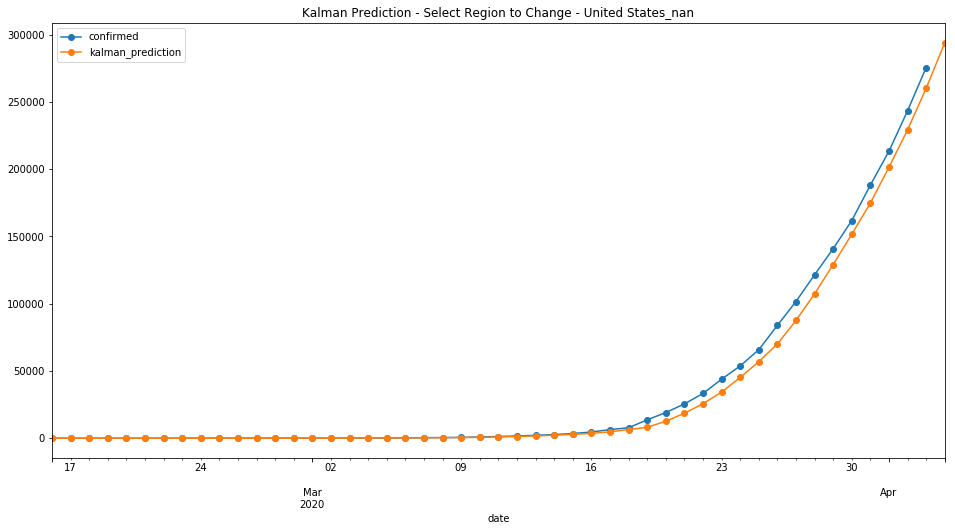

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse         rmse          mae
129  Germany_nan  1.959765e+08  13999.15943  2907.541667


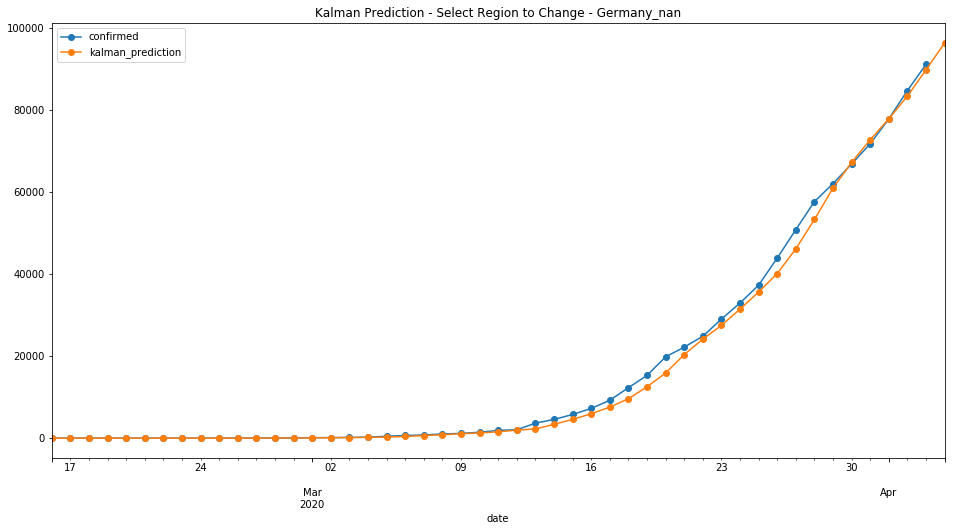

In [41]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
125  France_nan  1.005471e+08  10027.316723  2147.666667


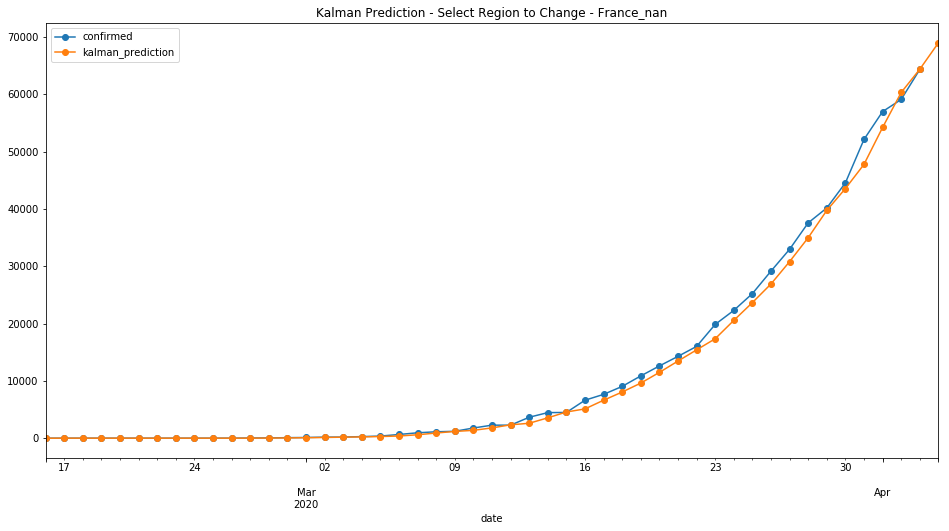

In [42]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse         mae
203  Portugal_nan  2.403337e+06  1550.270118  338.104167


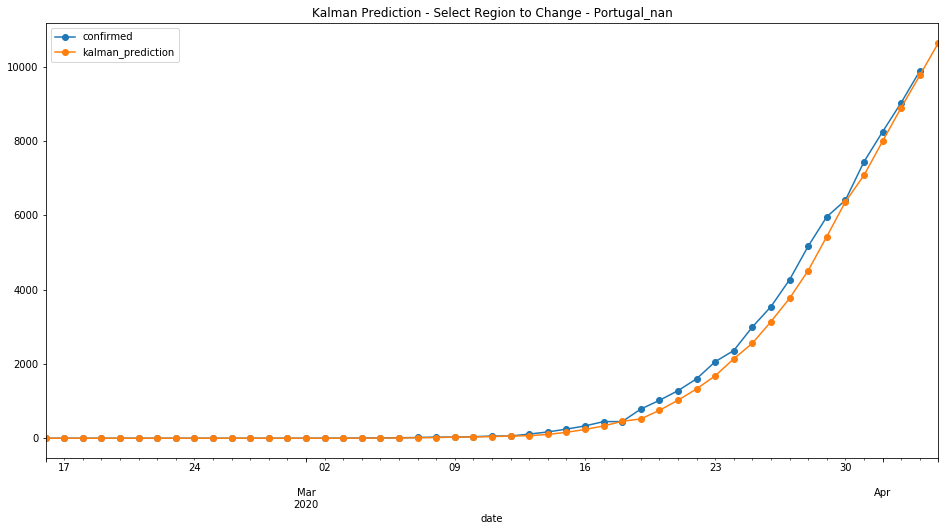

In [43]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region        mse         rmse      mae
227  Switzerland_nan  9002113.0  3000.352146  620.125


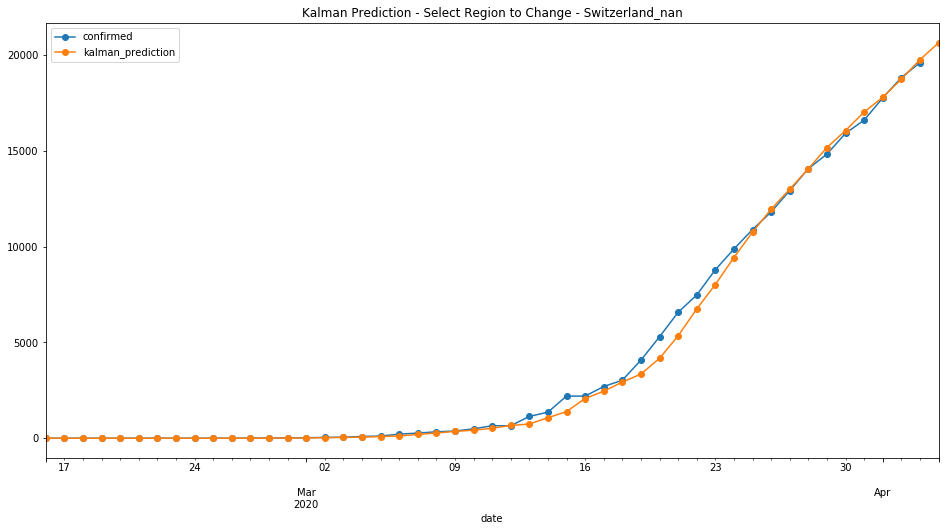

In [44]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region          mse         rmse    mae
16  Austria_nan  3215203.125  1793.098749  405.5


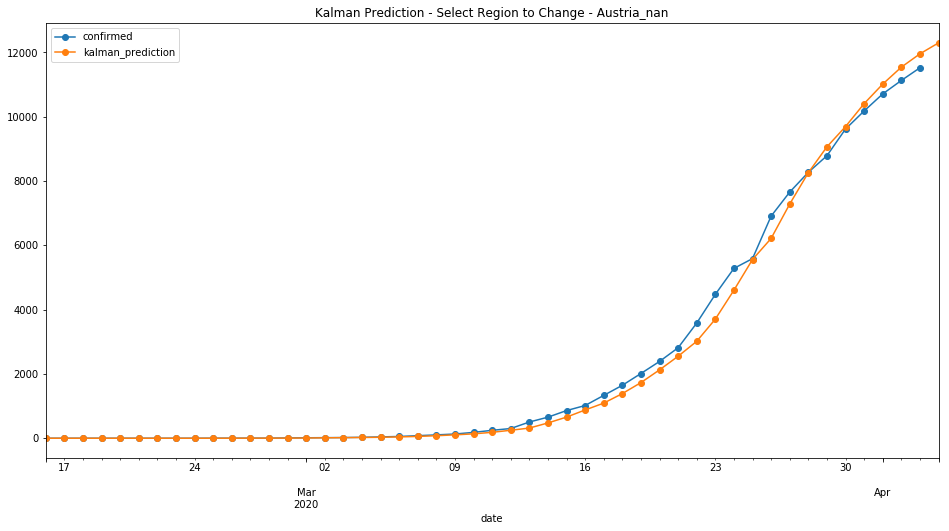

In [45]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
236  Turkey_nan  1.112311e+07  3335.132038  802.666667


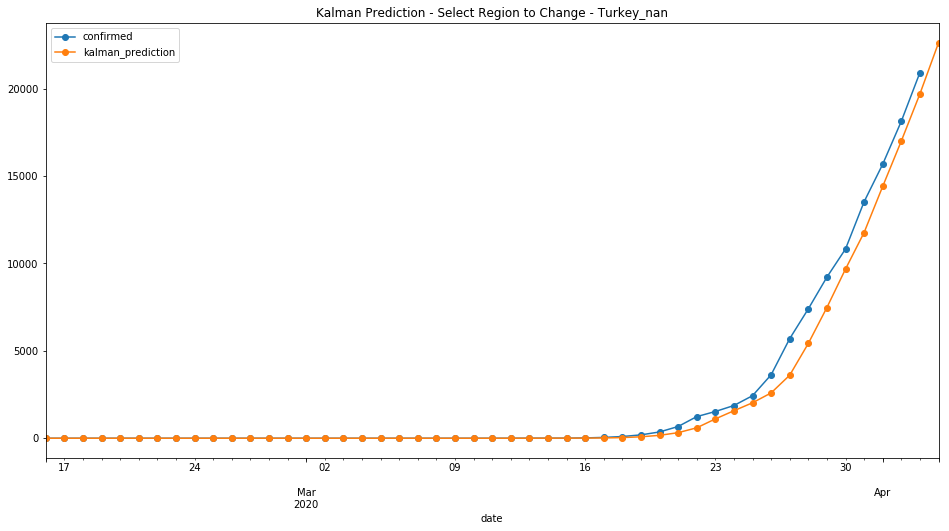

In [46]:
# Select region
region='Turkey_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

               region           mse         rmse         mae
154  Korea, South_nan  2.231207e+06  1493.722371  396.770833


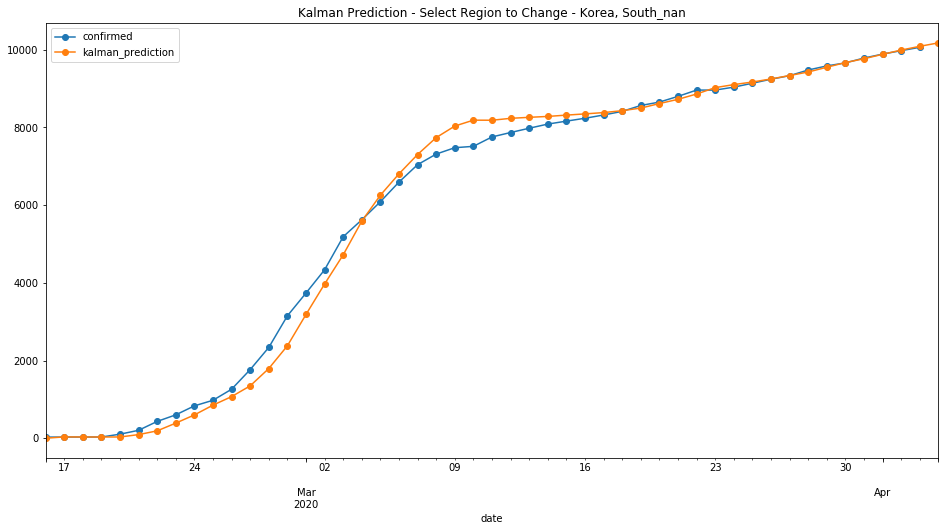

In [47]:
# Select region
region='Korea, South_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [48]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1jcnpimo
  JVM stdout: /tmp/tmp1jcnpimo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1jcnpimo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 9 days !!!
H2O cluster name:           H2O_from_python_unknownUser_boamy2
H2O cluster total nodes:    1
H2O cluster free memory:    7 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [49]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan', 
         'Vietnam_nan',
       ]
#

In [50]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-28']
boots=train_df[train_df['date']>='2020-03-26'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-04-01']]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-03-28']
test=test[test['date']<'2020-04-05']
test_v2=test[test['region'].isin(region_to_train)]

In [51]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [52]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [53]:
pred2.iloc[175:195]

0  confirmed       date        region
175     56.0          0 2020-04-04  Barbados_nan
176    100.0         94 2020-03-28   Belarus_nan
177     97.0         94 2020-03-29   Belarus_nan
178     97.0        152 2020-03-30   Belarus_nan
179    170.0        152 2020-03-31   Belarus_nan
180    168.0        163 2020-04-01   Belarus_nan
181    194.0        304 2020-04-02   Belarus_nan
182    358.0        351 2020-04-03   Belarus_nan
183    419.0          0 2020-04-04   Belarus_nan
184   8488.0       9134 2020-03-28   Belgium_nan
185  10913.0      10836 2020-03-29   Belgium_nan
186  12710.0      11899 2020-03-30   Belgium_nan
187  13835.0      12775 2020-03-31   Belgium_nan
188  14352.0      13964 2020-04-01   Belgium_nan
189  15288.0      15348 2020-04-02   Belgium_nan
190  16801.0      16770 2020-04-03   Belgium_nan
191  18383.0          0 2020-04-04   Belgium_nan
192     -3.0          2 2020-03-28    Belize_nan
193     -2.0          2 2020-03-29    Belize_nan
194     -3.0          3 2020-03-30    Belize_nan

In [54]:
pred2.iloc[220:240]

0  confirmed       date                      region
220  119.0        115 2020-04-01                 Bolivia_nan
221  129.0        123 2020-04-02                 Bolivia_nan
222  133.0        132 2020-04-03                 Bolivia_nan
223  143.0          0 2020-04-04                 Bolivia_nan
224  267.0        258 2020-03-28  Bosnia and Herzegovina_nan
225  288.0        323 2020-03-29  Bosnia and Herzegovina_nan
226  379.0        368 2020-03-30  Bosnia and Herzegovina_nan
227  416.0        420 2020-03-31  Bosnia and Herzegovina_nan
228  489.0        459 2020-04-01  Bosnia and Herzegovina_nan
229  513.0        533 2020-04-02  Bosnia and Herzegovina_nan
230  599.0        579 2020-04-03  Bosnia and Herzegovina_nan
231  641.0          0 2020-04-04  Bosnia and Herzegovina_nan
232    8.0          0 2020-03-28                Botswana_nan
233    8.0          0 2020-03-29                Botswana_nan
234    8.0          3 2020-03-30                Botswana_nan
235   12.0          4 2020-03-31                Botswana_nan
236    0.0          4 2020-04-01                Botswana_nan
237    4.0          4 2020-04-02                Botswana_nan
238    2.0          4 2020-04-03                Botswana_nan
239    2.0          0 2020-04-04                Botswana_nan

In [55]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         4.717974e+13           1.000000    0.392983
1            last_day         3.242059e+13           0.687172    0.270047
2       infected_rate         1.685952e+13           0.357347    0.140431
3              region         1.197056e+13           0.253723    0.099709
4        7_day_change         6.068741e+12           0.128630    0.050549
5        3_day_change         3.187497e+12           0.067561    0.026550
6        1_day_change         1.586886e+12           0.033635    0.013218
7                 min         2.046569e+11           0.004338    0.001705
8                 max         1.744617e+11           0.003698    0.001453
9   1_day_change_rate         1.506126e+11           0.003192    0.001255
10  7_day_change_rate         1.399631e+11           0.002967    0.001166
11  3_day_change_rate         1.123366e+11           0.002381    0.000936

In [57]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


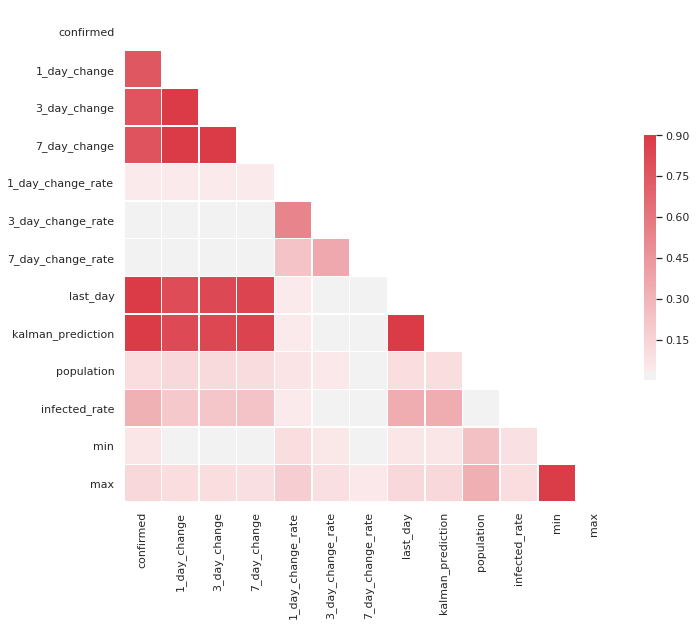

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.754890
3_day_change         0.768067
7_day_change         0.780738
1_day_change_rate    0.040906
3_day_change_rate    0.018654
7_day_change_rate    0.009174
last_day             0.913128
kalman_prediction    0.914677
population           0.102638
infected_rate        0.320649
min                  0.063998
max                  0.128079
Name: confirmed, dtype: float64


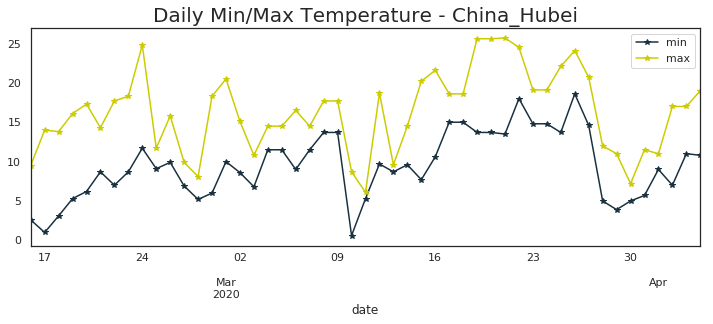

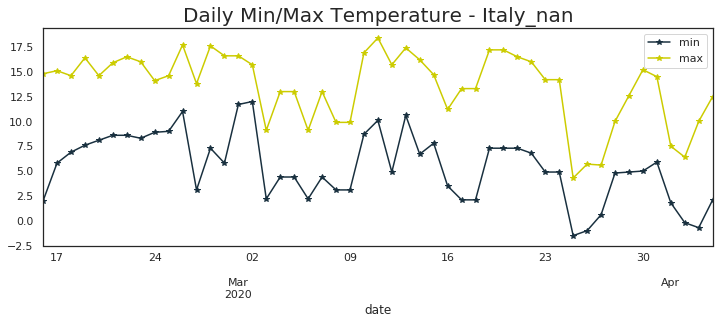

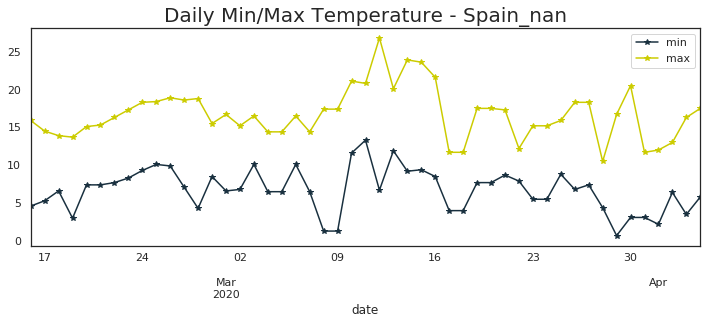

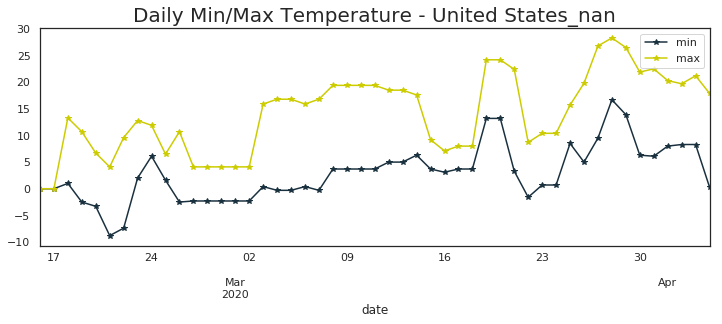

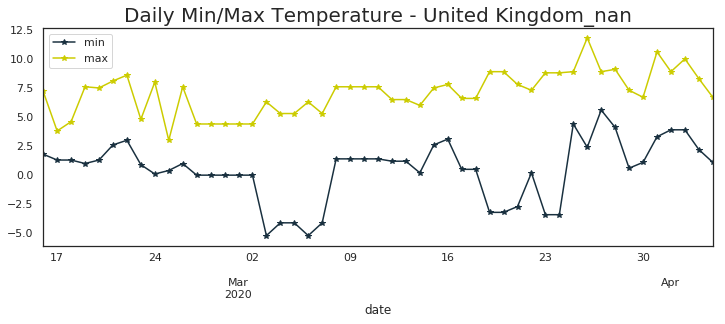

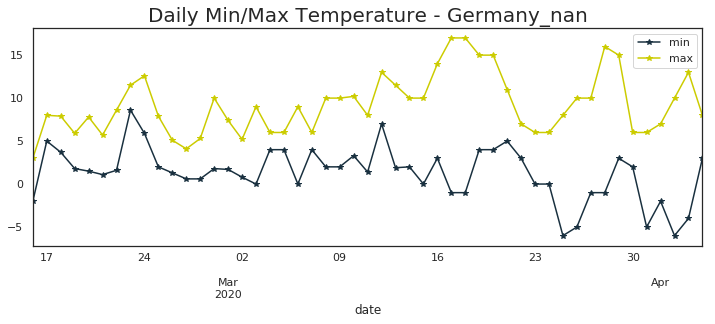

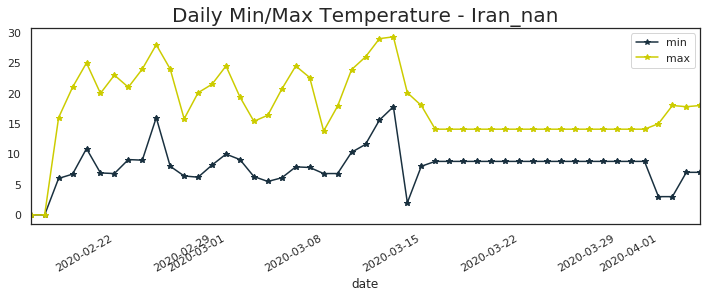

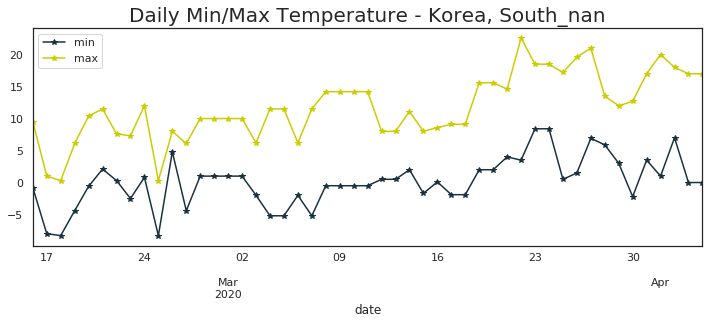

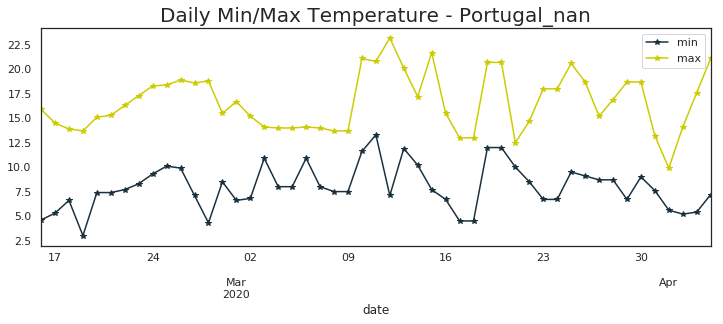

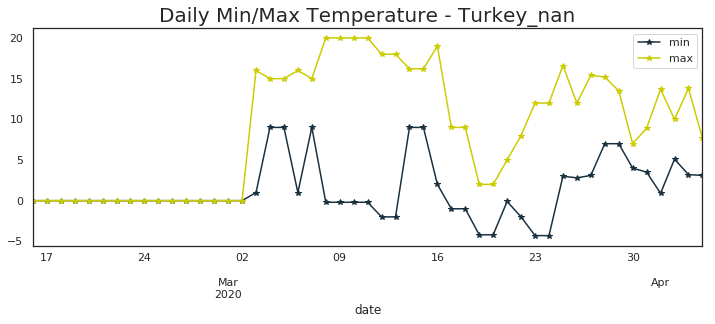

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan','Korea, South_nan','Portugal_nan','Turkey_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                9.442857  16.330612
United States_nan          2.863265  14.171429
Italy_nan                  5.412245  13.557143
Spain_nan                  6.714286  16.740816
Germany_nan                1.277551   9.218367
Iran_nan                   8.012245  17.863265
France_nan                 2.075510  11.585714
Korea, South_nan           0.124490  11.757143
United Kingdom_nan         0.485714   7.079592
Switzerland_nan           -3.324490   2.589796
Netherlands_nan            2.879592   7.279592
Belgium_nan                3.661224  10.291837
Austria_nan               -4.697959   1.789796
Turkey_nan                 1.342857   8.922449
Portugal_nan               7.955102  16.630612
Norway_nan                -7.330612  -0.520408
China_Guangdong           16.738776  24.336735
Brazil_nan                22.055102  29.797959
China_Henan             

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

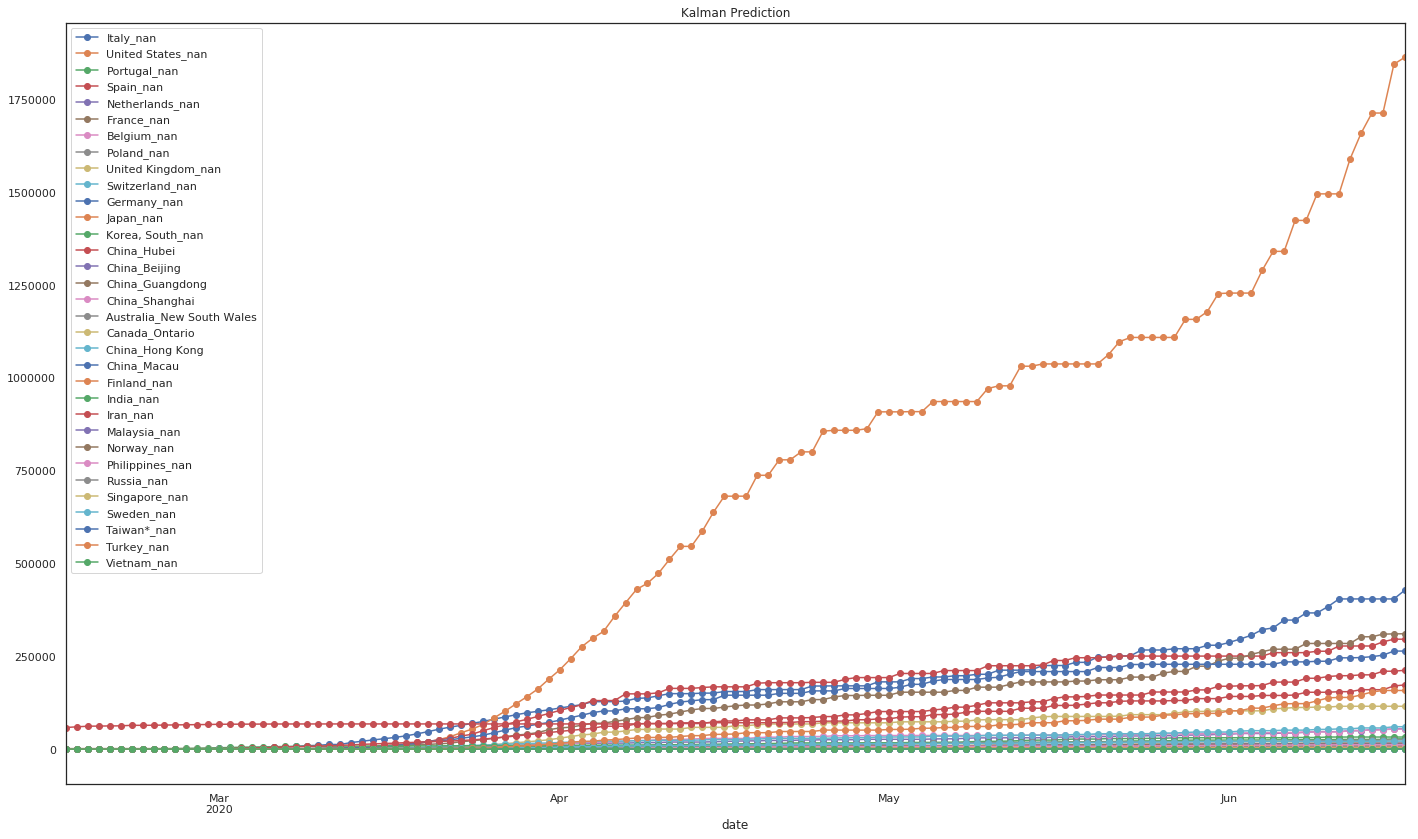

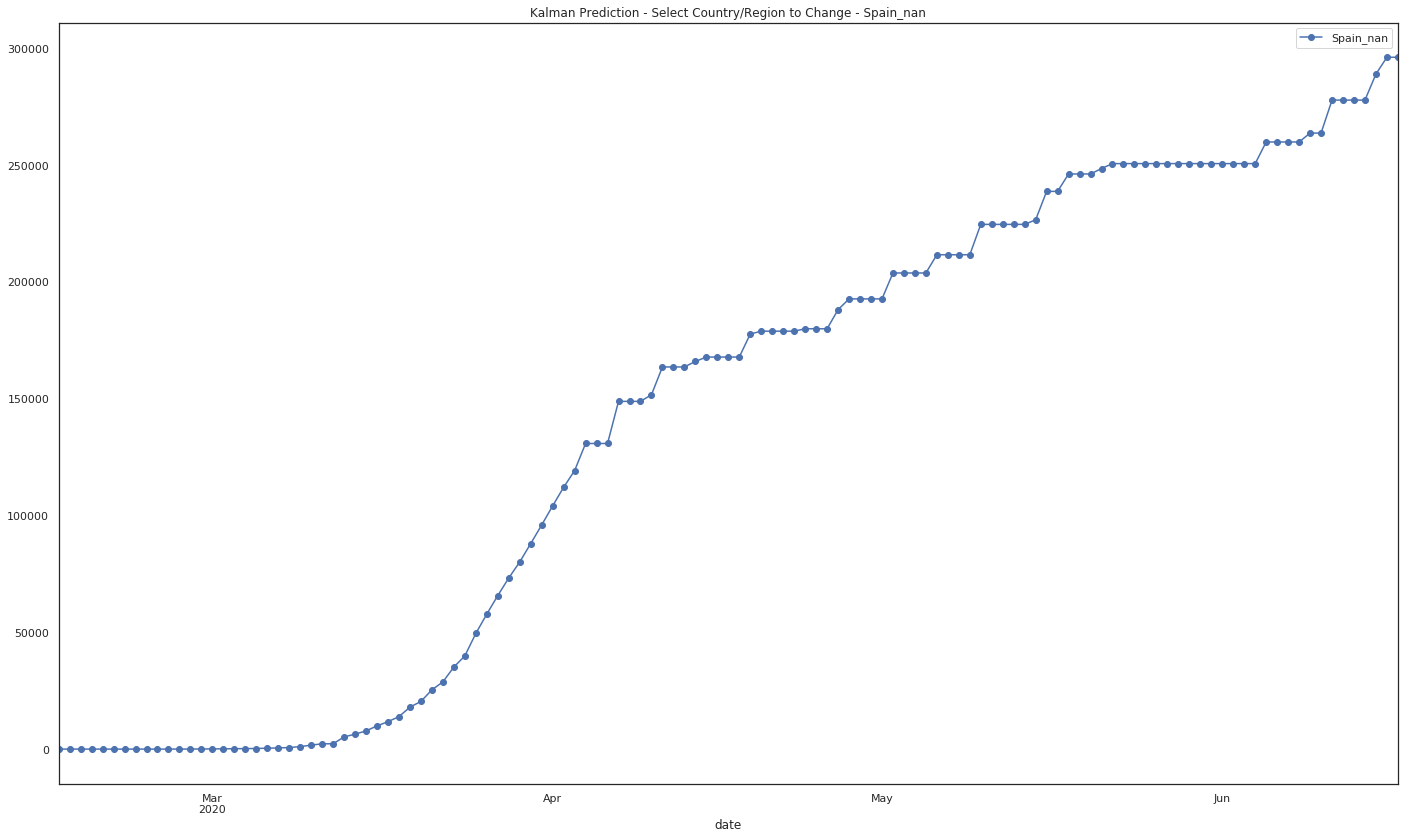

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


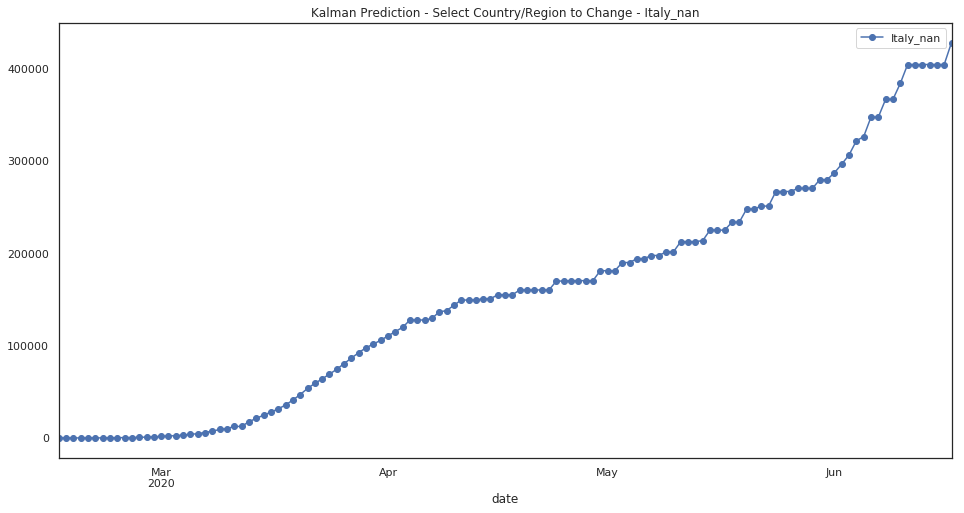

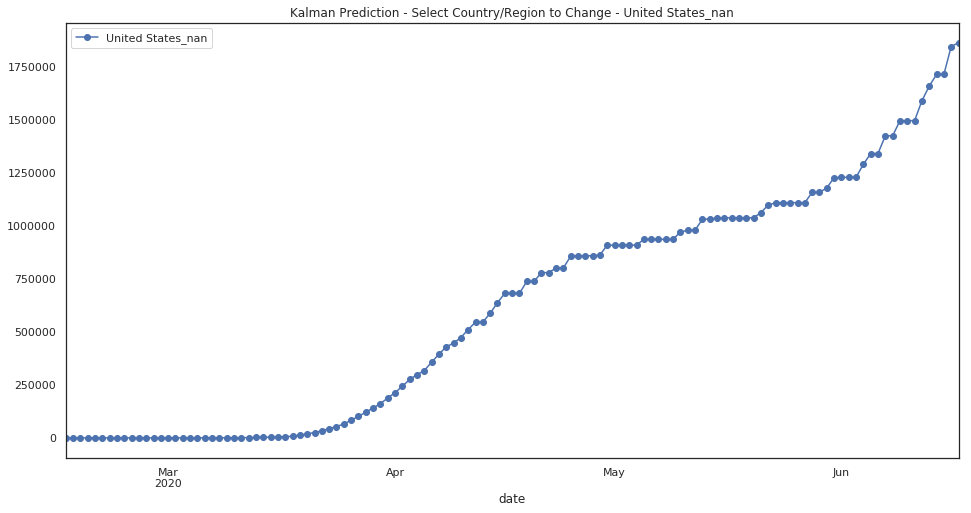

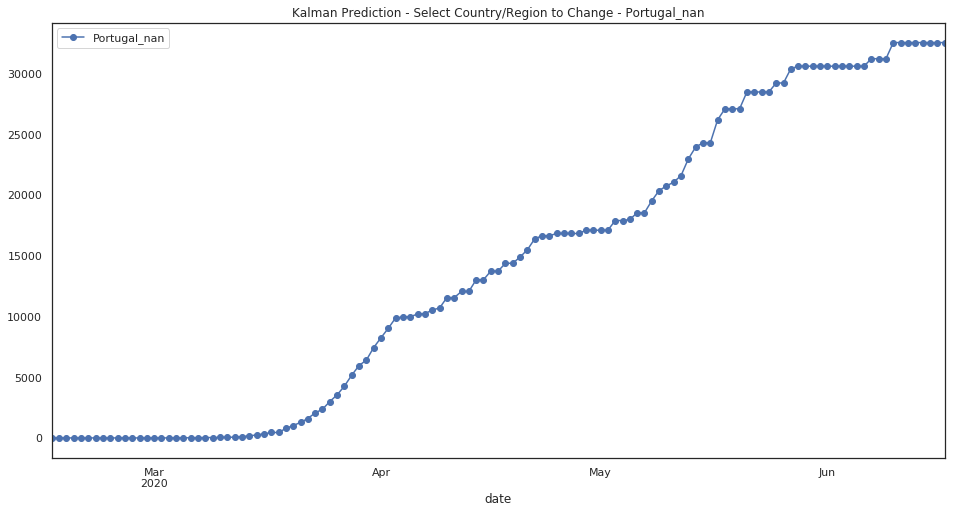

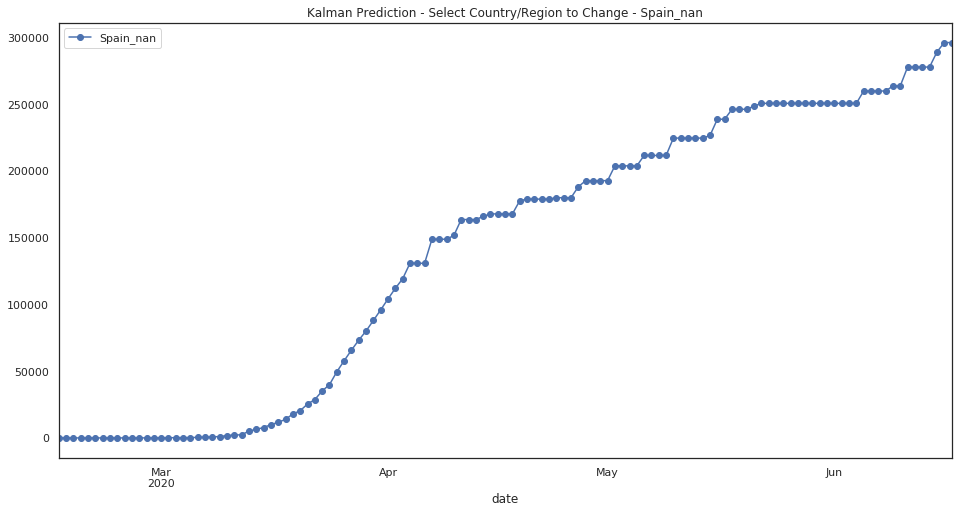

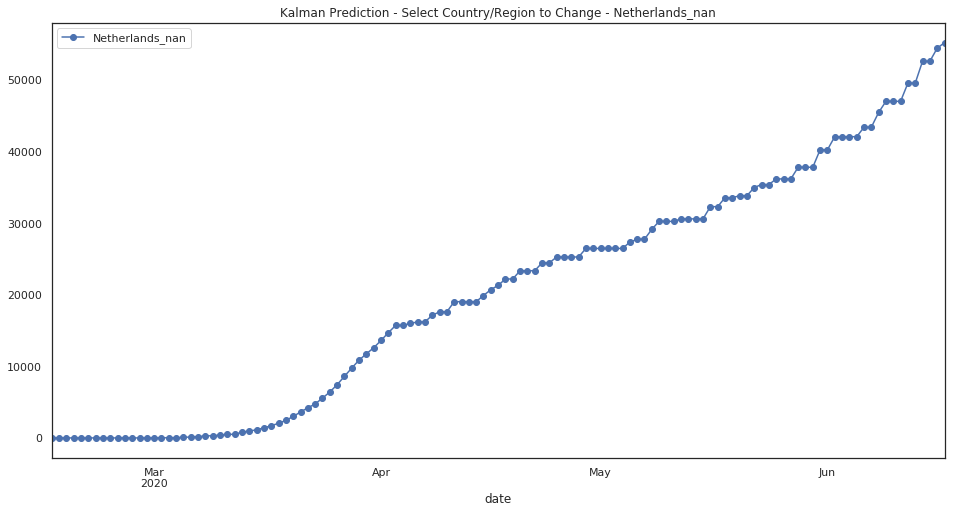

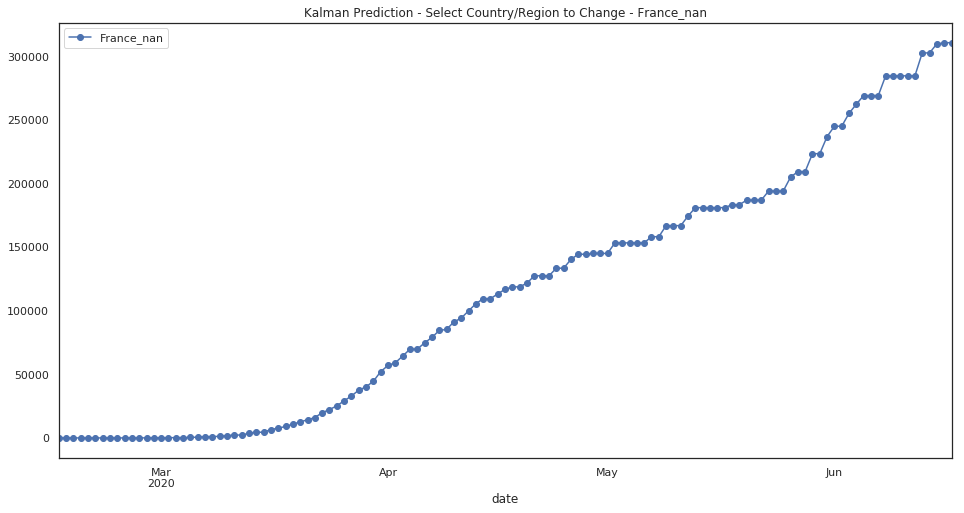

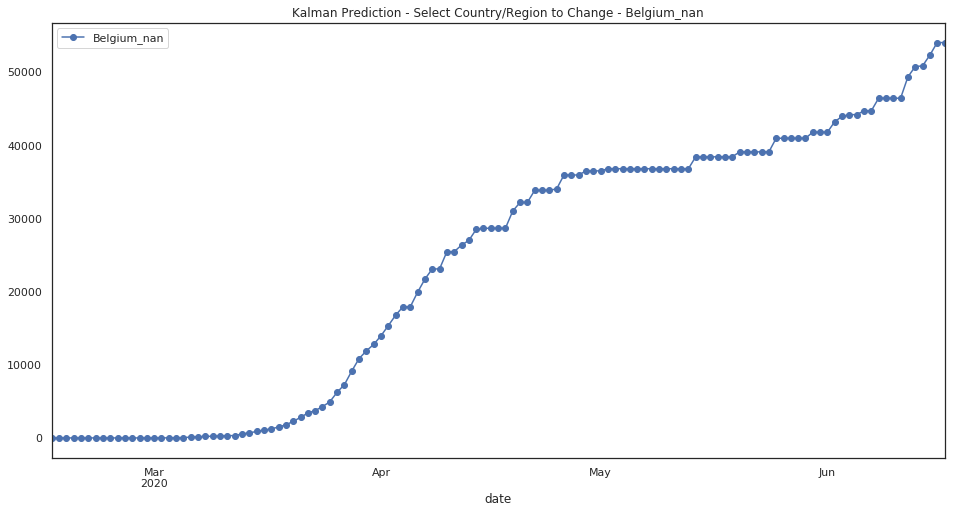

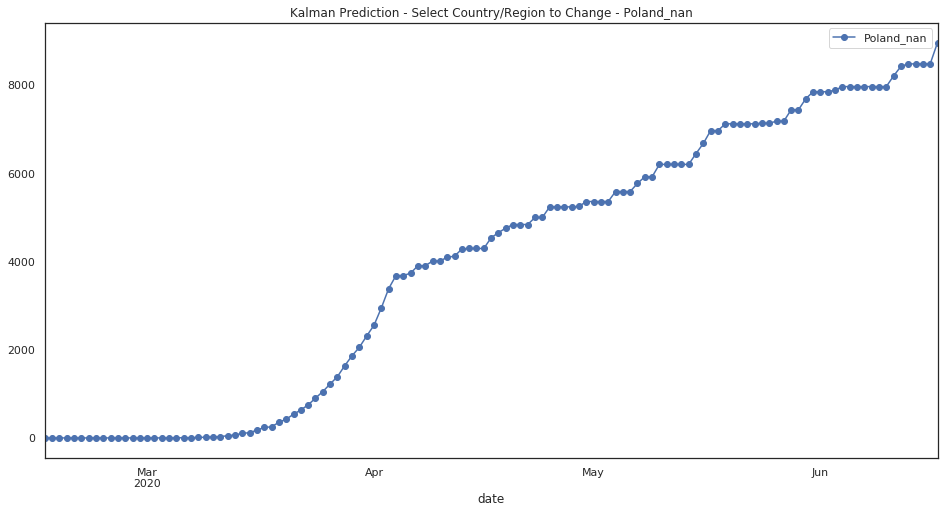

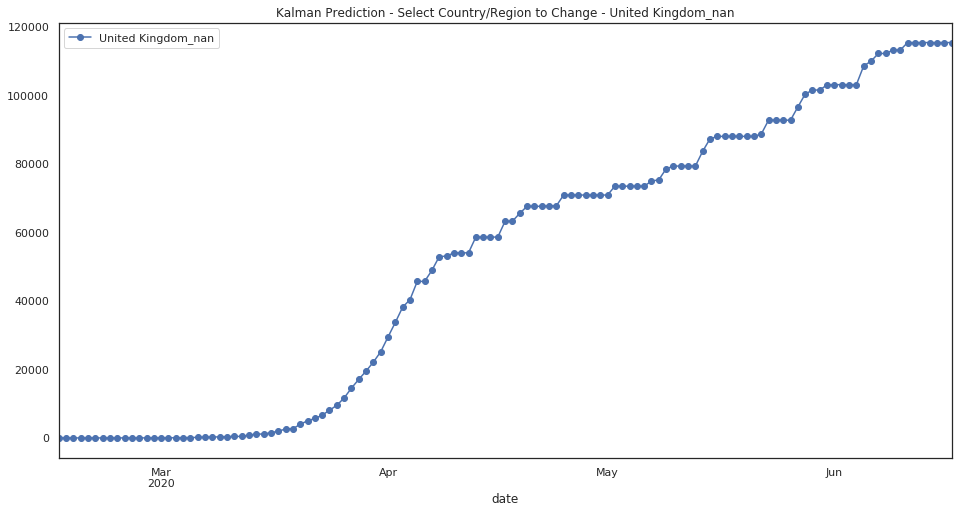

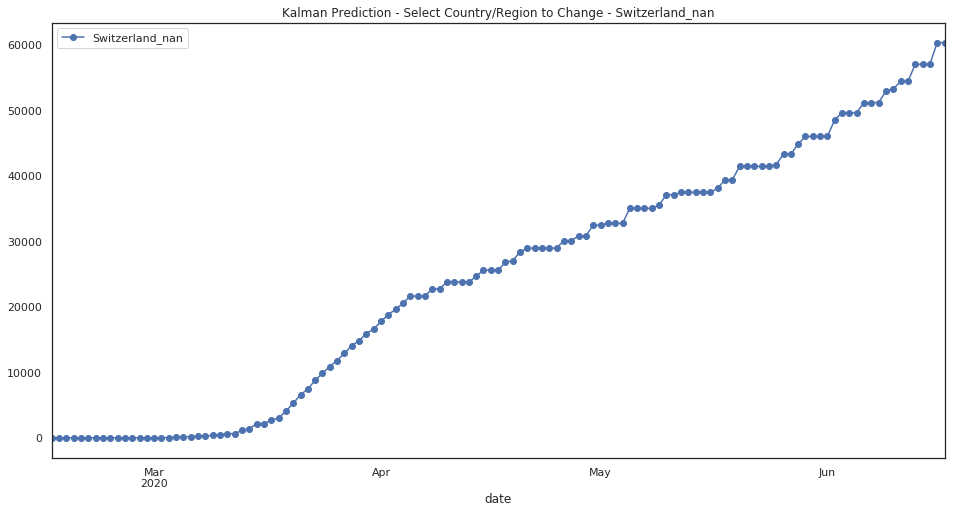

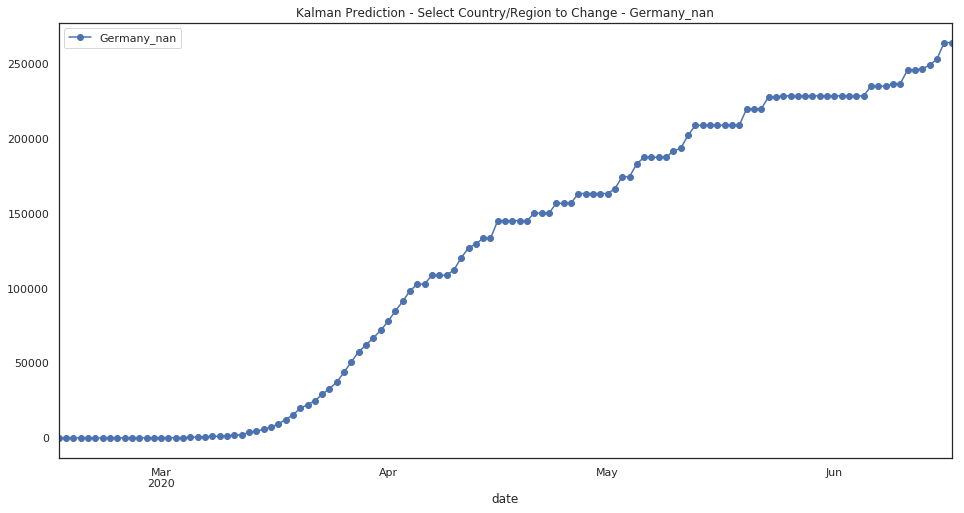

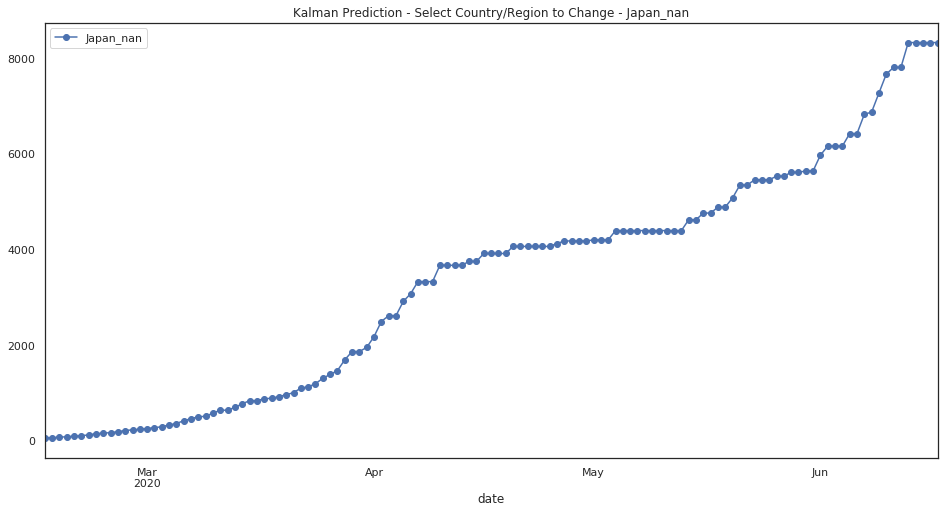

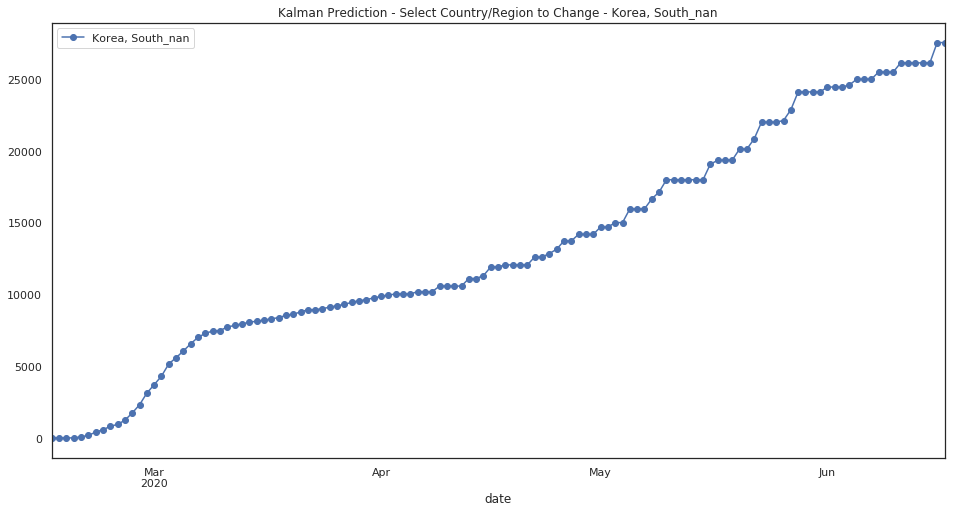

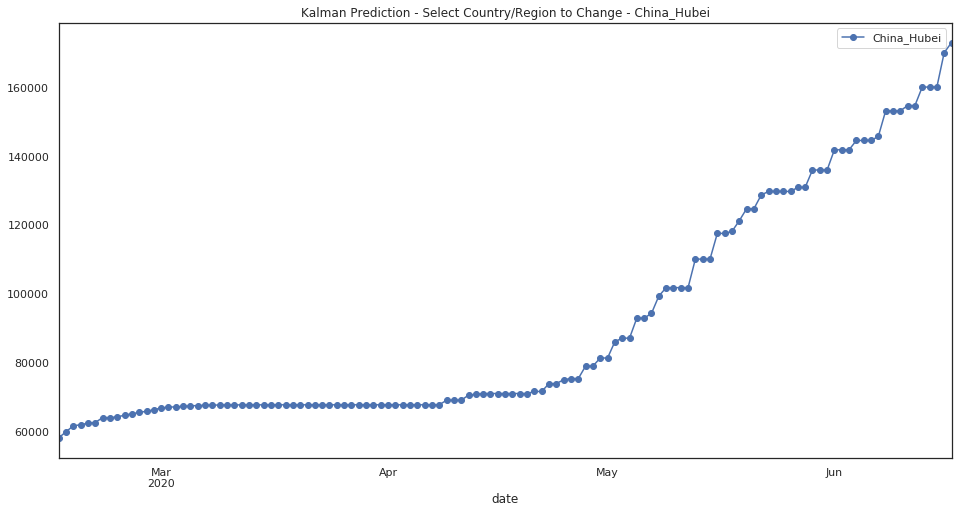

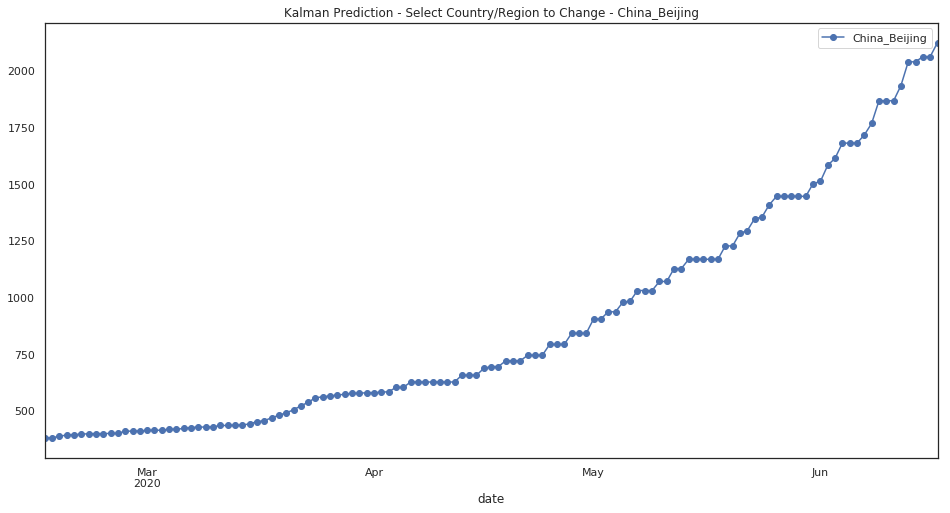

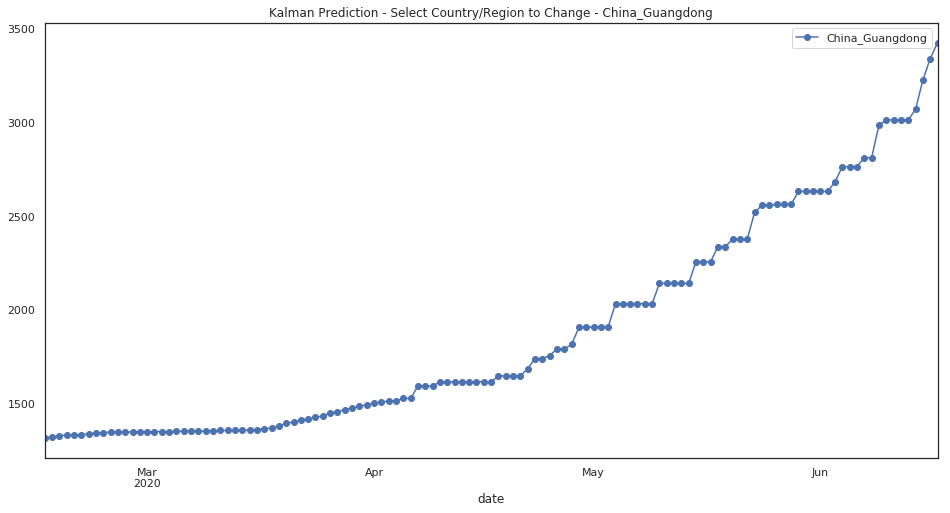

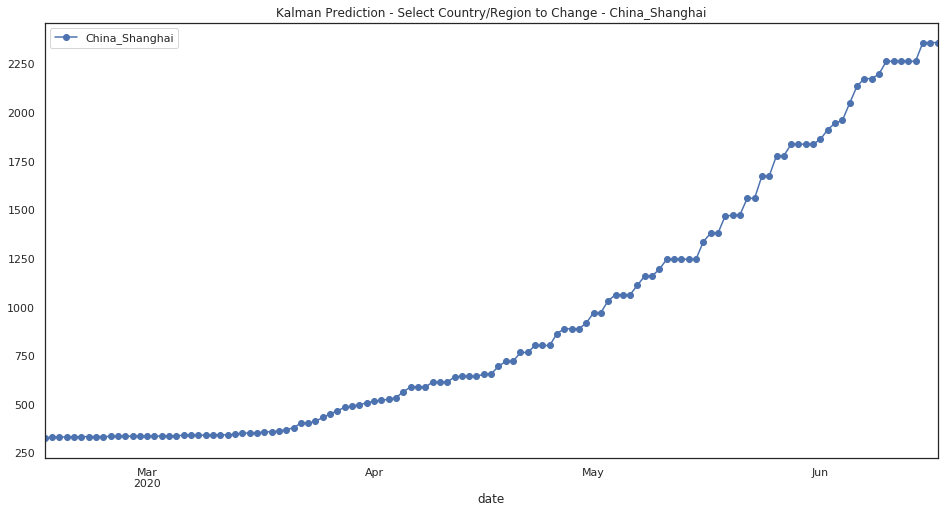

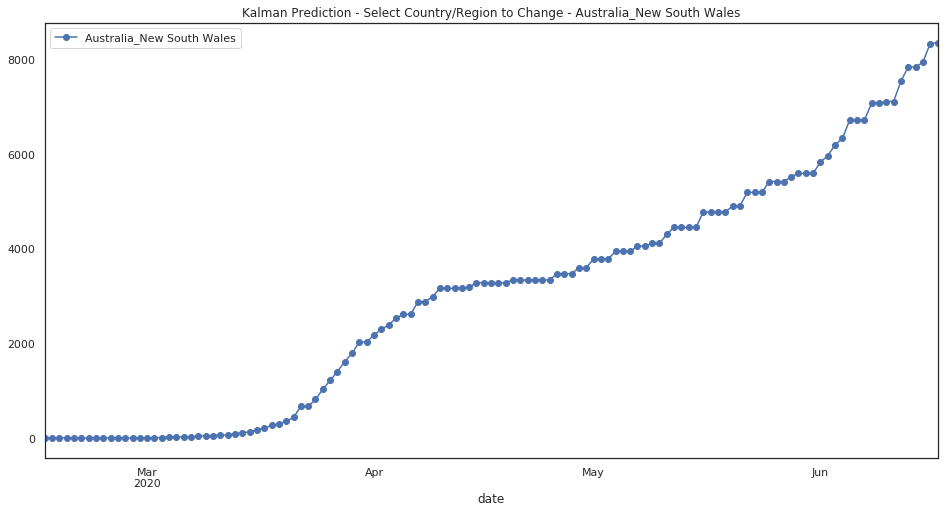

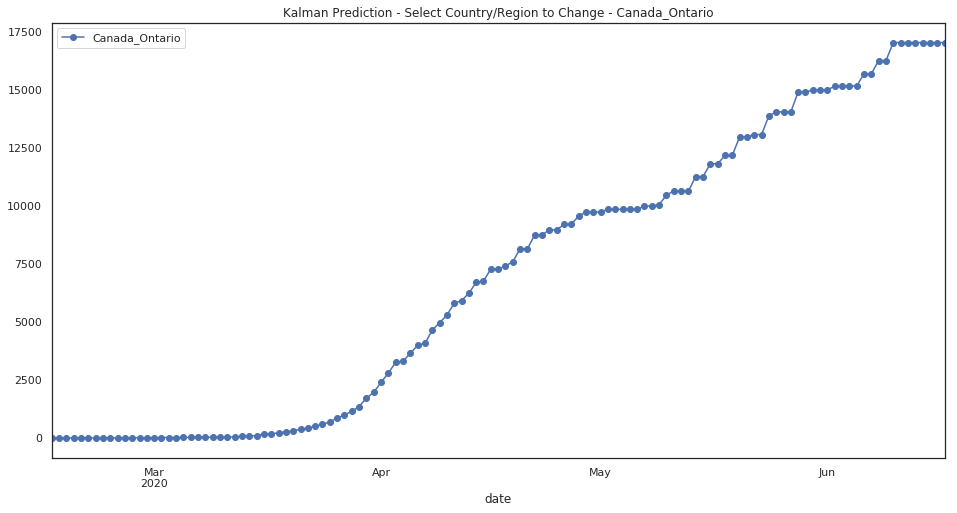

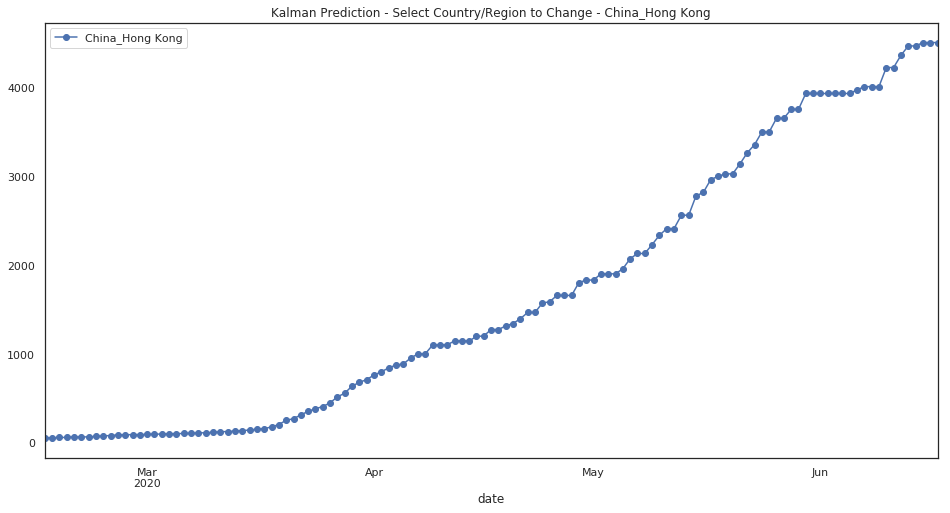

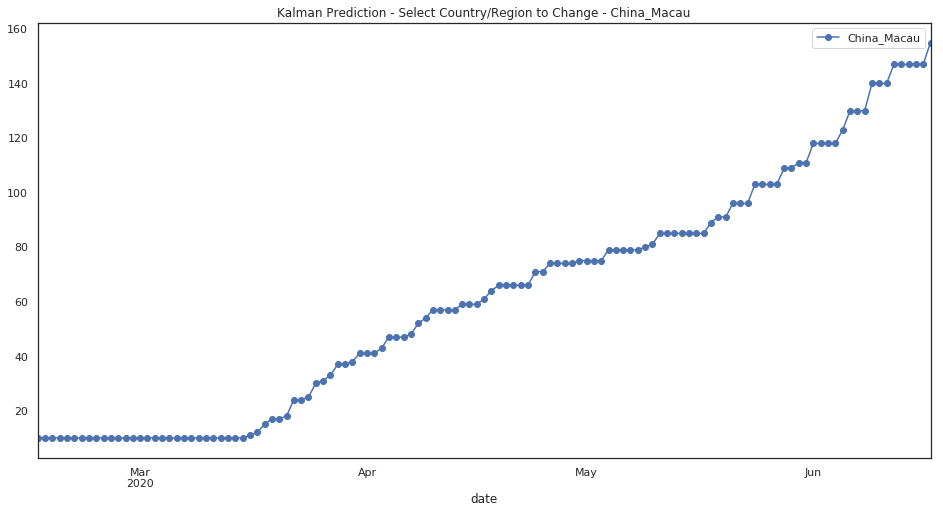

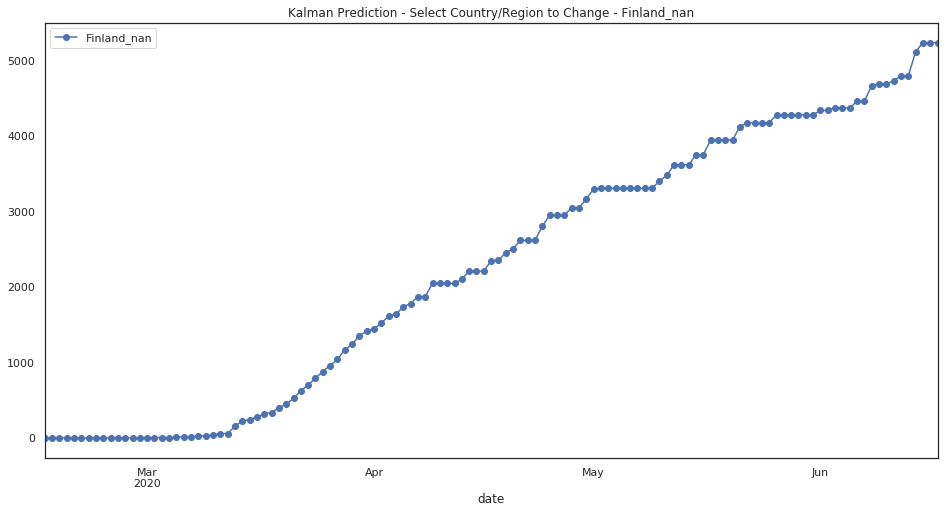

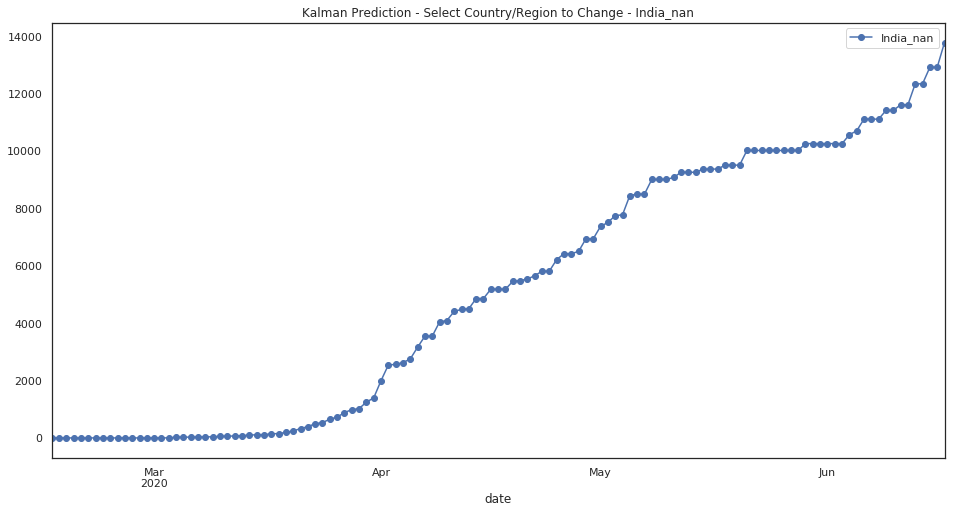

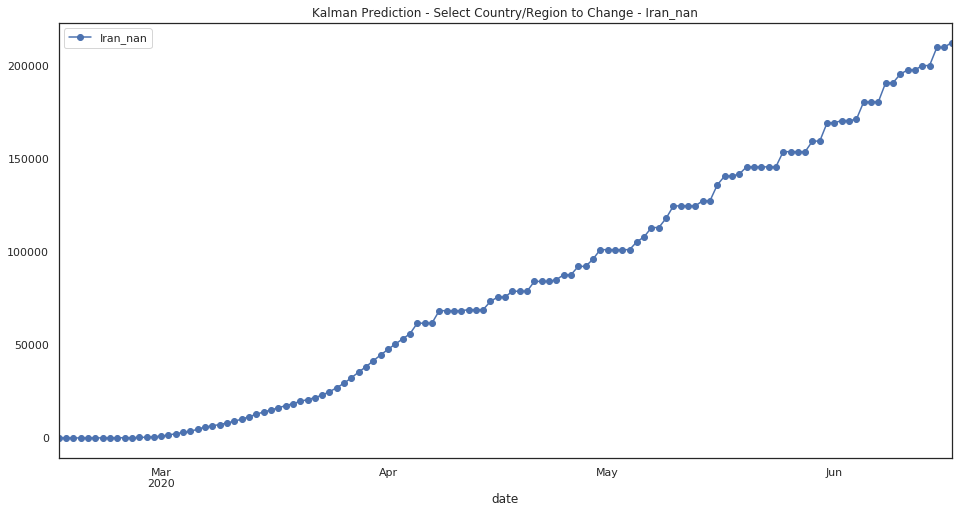

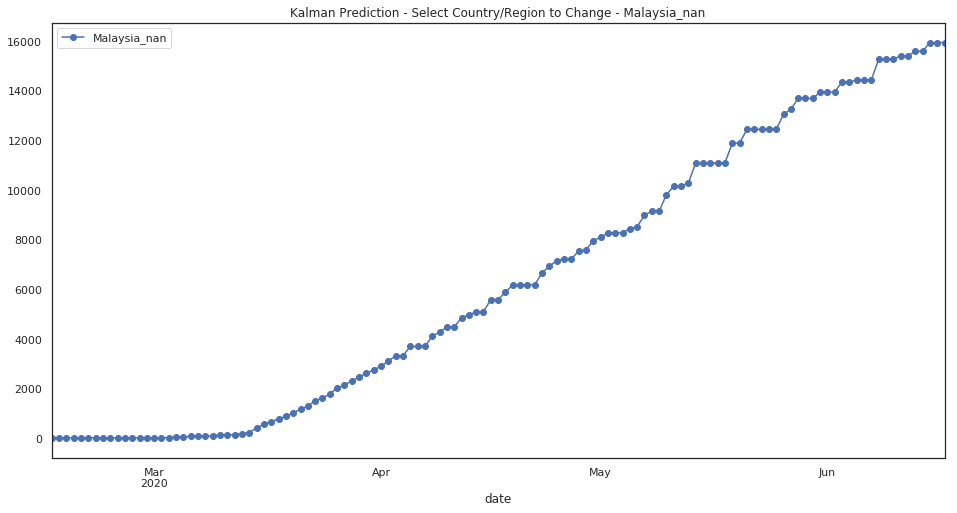

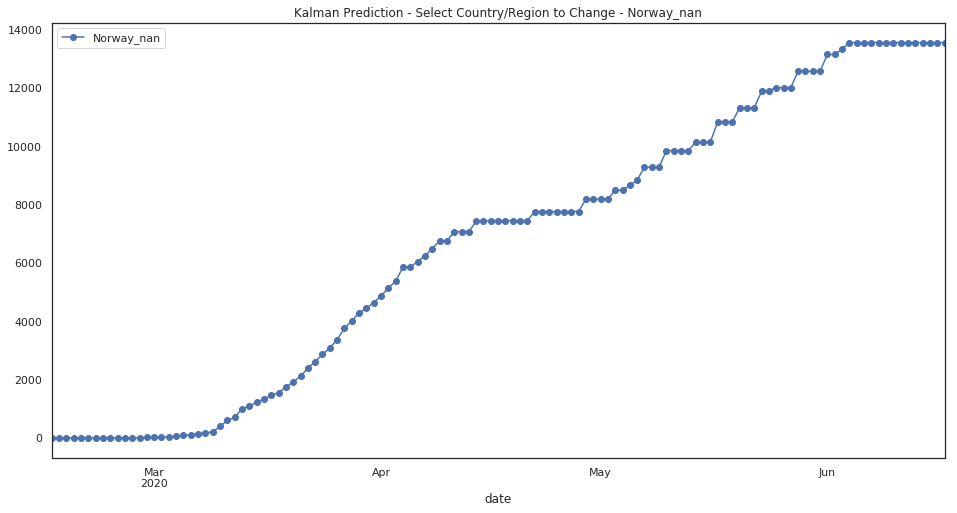

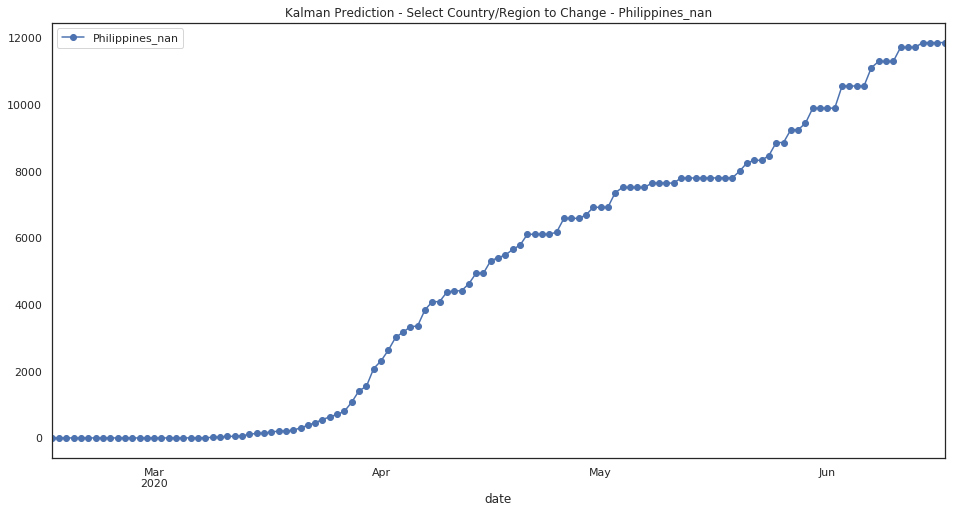

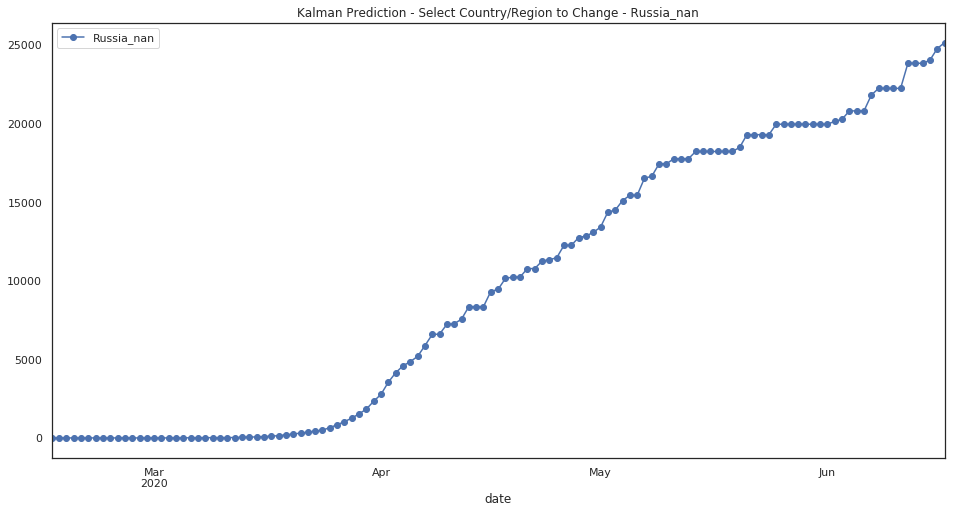

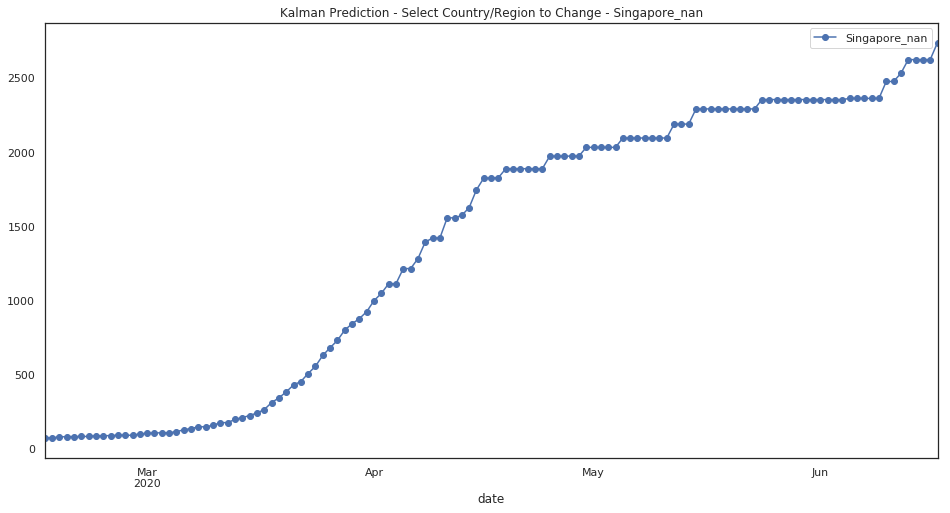

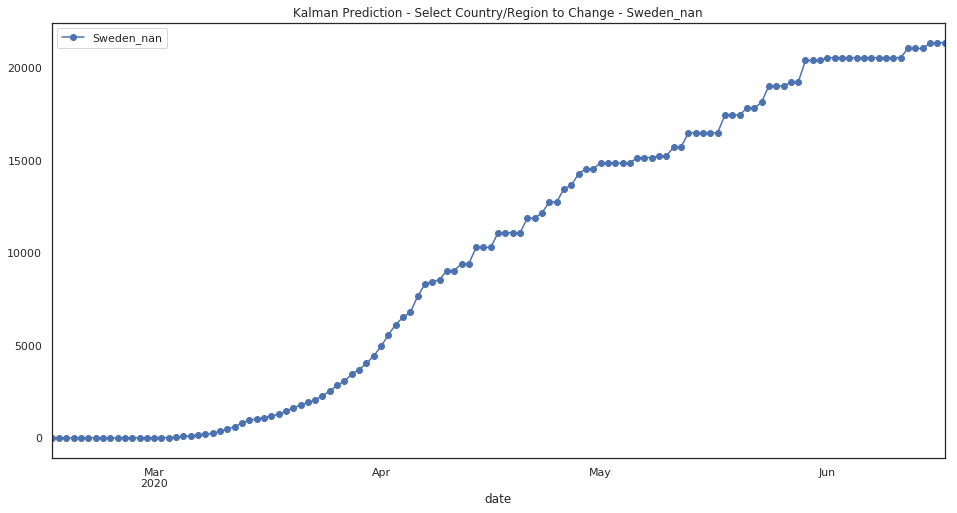

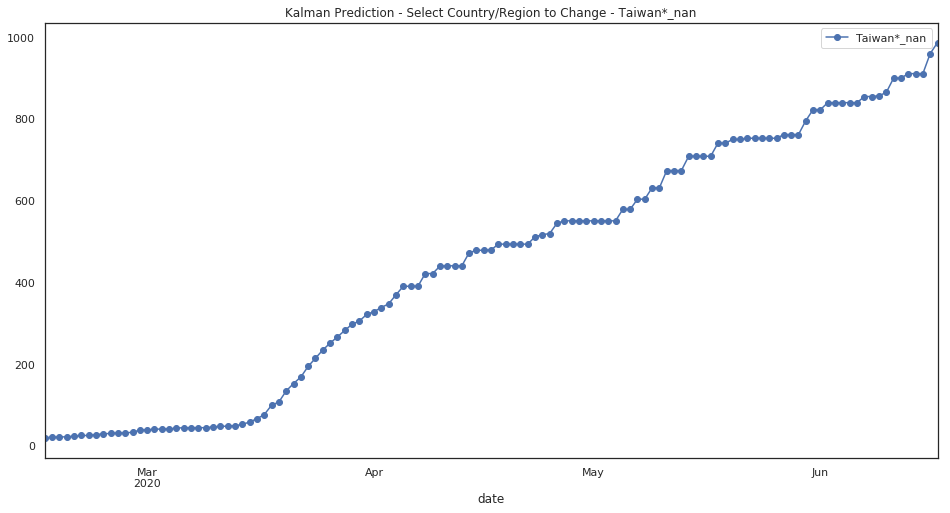

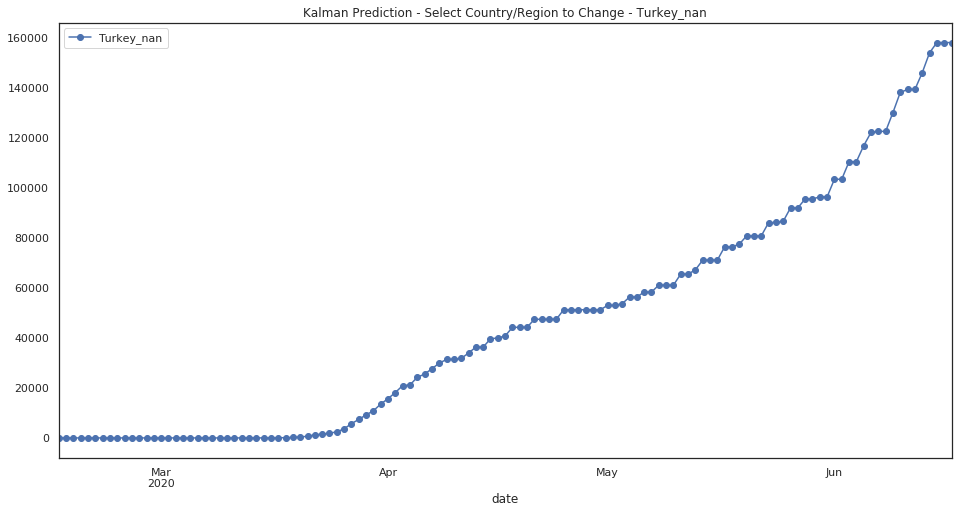

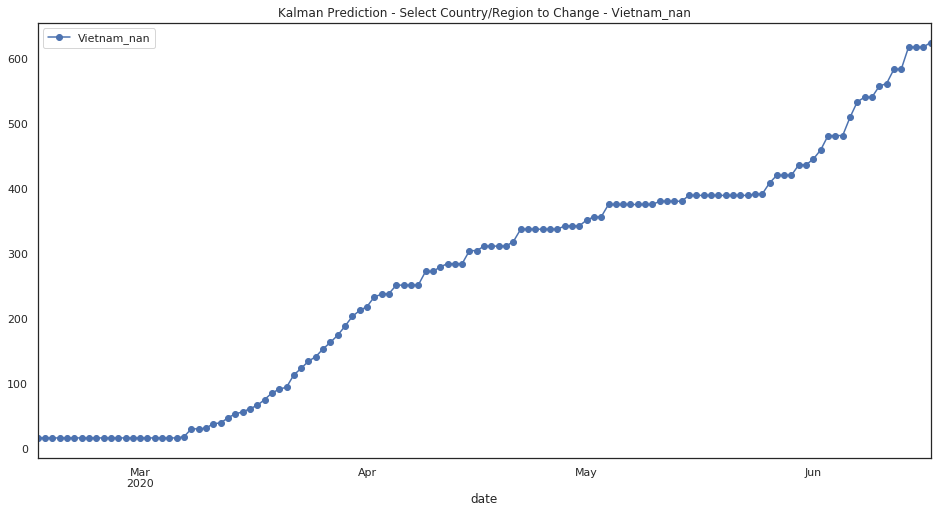

In [67]:
### Joao - Dynamic print
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [69]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [70]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [71]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [72]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [73]:
pred[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-01            174.0        243.0        716.0        376.0   
2020-04-02            237.0        259.0        847.0        390.0   
2020-04-03            273.0        277.0        986.0        428.0   
2020-04-04            281.0        304.0       1171.0        439.0   
2020-04-05            318.0        304.0       1171.0        439.0   
2020-04-06            350.0        321.0       1204.0        473.0   
2020-04-07            357.0        346.0       1292.0        476.0   
2020-04-08            415.0        346.0       1337.0        476.0   
2020-04-09            415.0        384.0       1492.0        491.0   
2020-04-10            430.0        384.0       1591.0        527.0   
2020-04-11            433.0        392.0       1591.0        549.0   
2020-04-12            438.0        399.0       1678.0        567.0   
2020-04-13            487.0        435.0       1844.0        582.0   
2020-04-14            487.0        435.0       1937.0        589.0   
2020-04-15            487.0        439.0       1937.0        589.0   
2020-04-16            522.0        463.0       1937.0        640.0   
2020-04-17            522.0        470.0       1937.0        640.0   
2020-04-18            523.0        479.0       1939.0        640.0   
2020-04-19            523.0        493.0       2012.0        640.0   
2020-04-20            568.0        504.0       2030.0        696.0   
2020-04-21            568.0        534.0       2030.0        714.0   
2020-04-22            568.0        543.0       2112.0        714.0   
2020-04-23            568.0        543.0       2144.0        757.0   
2020-04-24            568.0        582.0       2144.0        760.0   
2020-04-25            568.0        582.0       2280.0        762.0   
2020-04-26            568.0        600.0       2280.0        806.0   
2020-04-27            597.0        604.0       2299.0        806.0   
2020-04-28            597.0        625.0       2411.0        820.0   
2020-04-29            622.0        625.0       2411.0        820.0   
2020-04-30            628.0        625.0       2411.0        820.0   
...                     ...          ...          ...          ...   
2020-05-20            915.0        835.0       2941.0        955.0   
2020-05-21            947.0        835.0       2941.0        955.0   
2020-05-22            962.0        860.0       2960.0        955.0   
2020-05-23           1007.0        860.0       3061.0        975.0   
2020-05-24           1007.0        860.0       3061.0        975.0   
2020-05-25           1083.0        860.0       3061.0        975.0   
2020-05-26           1083.0        874.0       3061.0        975.0   
2020-05-27           1083.0        874.0       3061.0        989.0   
2020-05-28           1083.0        874.0       3061.0       1017.0   
2020-05-29           1097.0        874.0       3093.0       1017.0   
2020-05-30           1177.0        874.0       3093.0       1017.0   
2020-05-31           1177.0        874.0       3175.0       1062.0   
2020-06-01           1177.0        897.0       3175.0       1062.0   
2020-06-02           1179.0        932.0       3175.0       1070.0   
2020-06-03           1236.0        932.0       3272.0       1070.0   
2020-06-04           1236.0        933.0       3382.0       1070.0   
2020-06-05           1287.0        933.0       3382.0       1135.0   
2020-06-06           1293.0        970.0       3382.0       1135.0   
2020-06-07           1317.0        970.0       3382.0       1139.0   
2020-06-08           1341.0        970.0       3418.0       1139.0   
2020-06-09           1341.0        970.0       3418.0       1167.0   
2020-06-10           1341.0        970.0       3503.0       1167.0   
2020-06-11           1341.0        970.0       3503.0       1167.0   
2020-06-12           1341.0        970.0       3503.0       1167.0   
2020-06-13

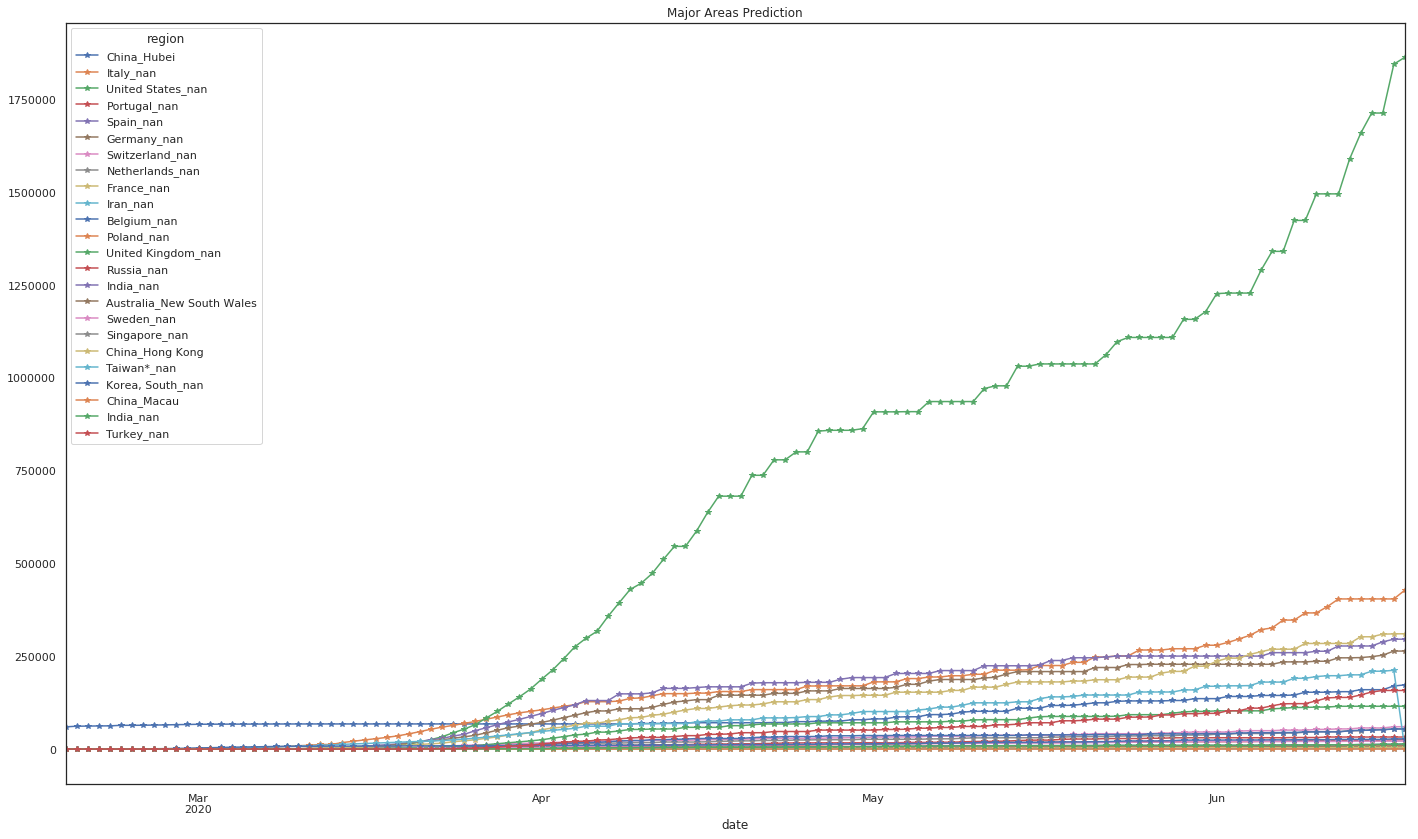

In [74]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
        'Turkey_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

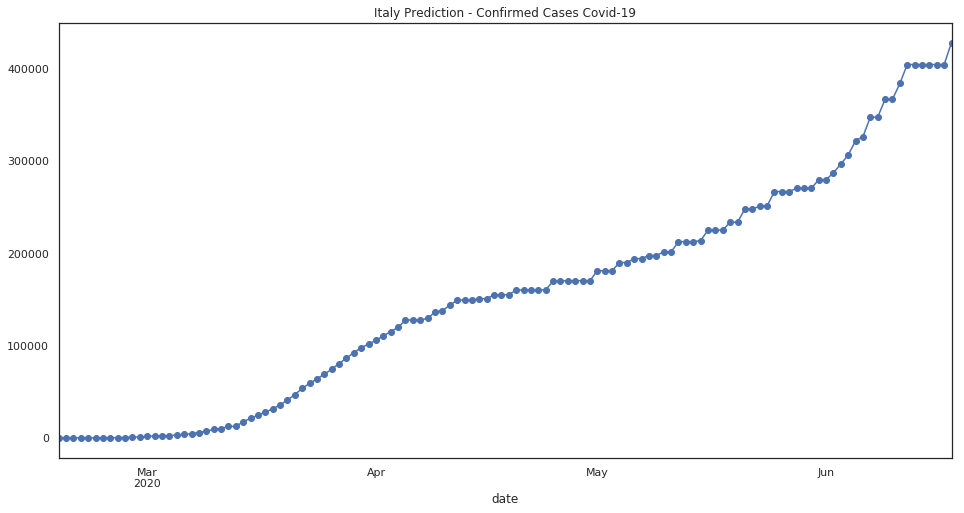

In [75]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2[2:].plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

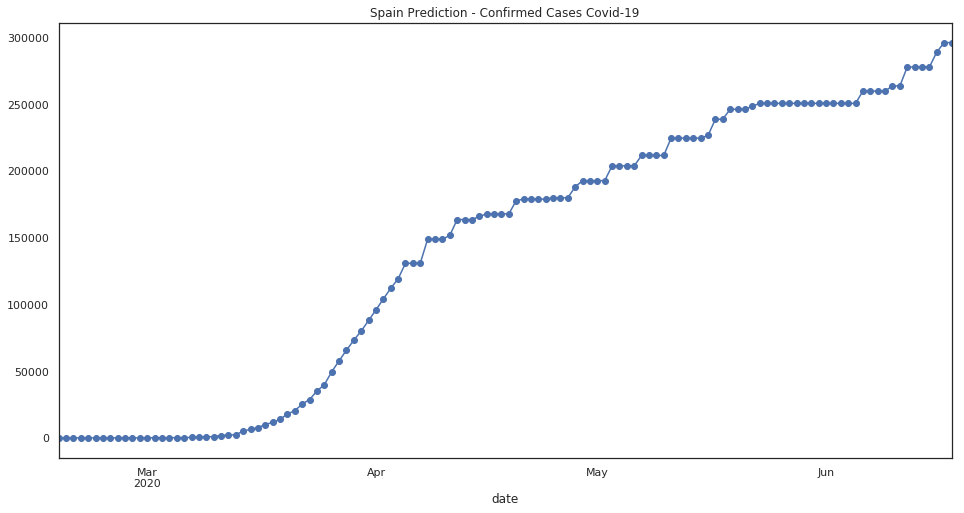

In [76]:
p3=pred['Spain_nan']
p3[2:].plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

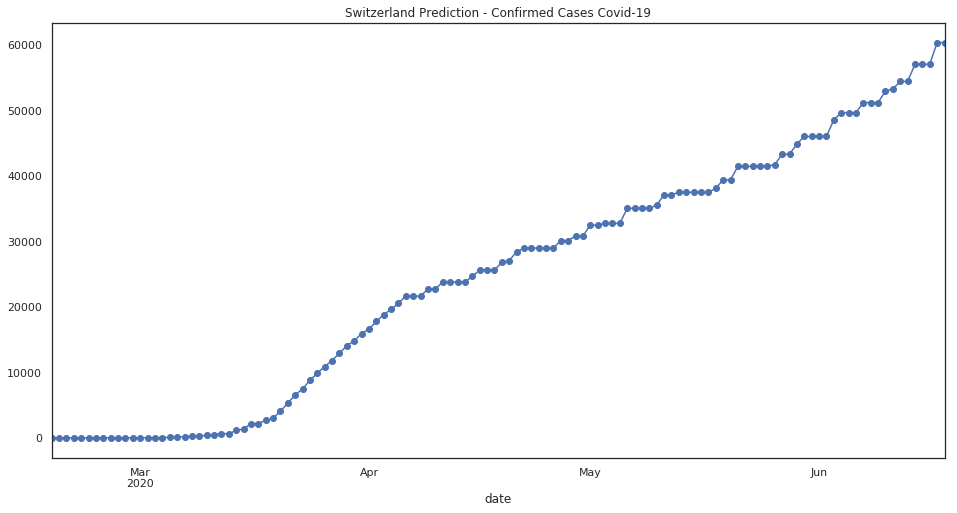

In [77]:
p4=pred['Switzerland_nan']
p4[2:].plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

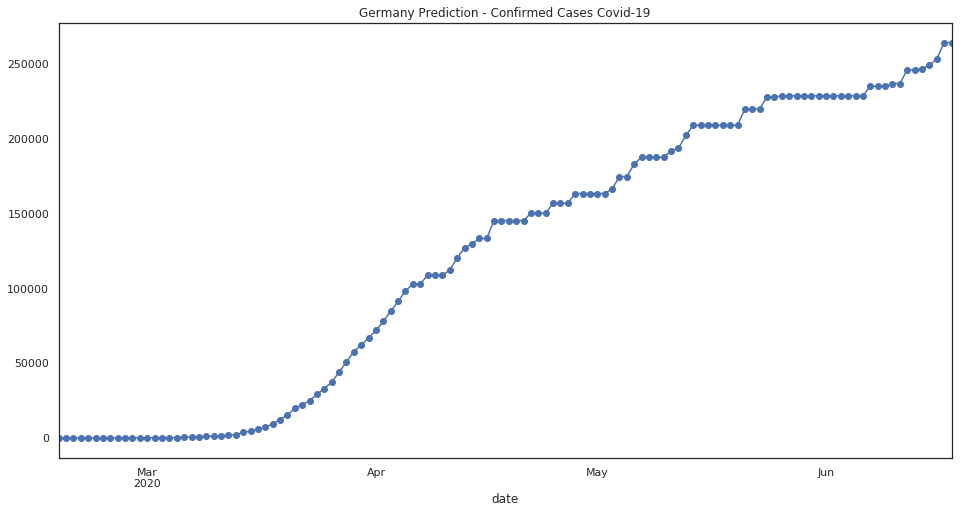

In [78]:
p5=pred['Germany_nan']
p5[2:].plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

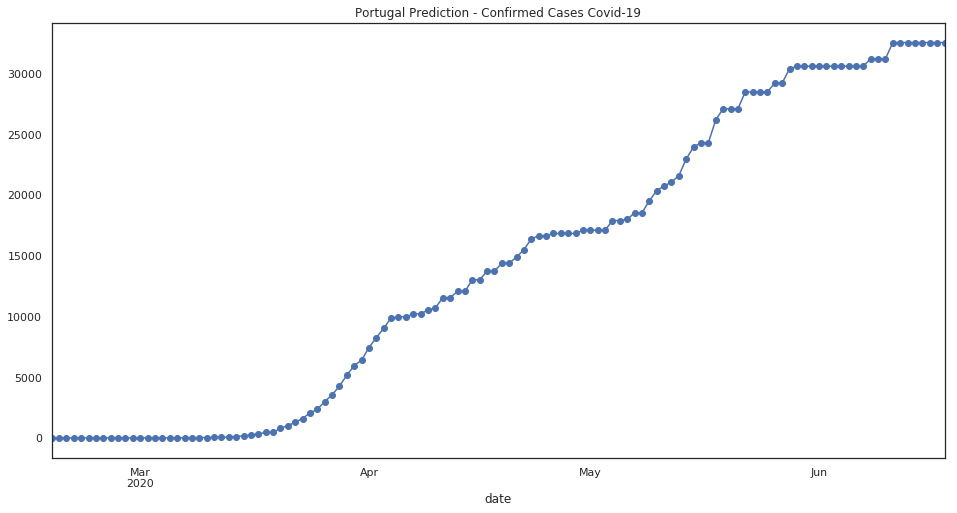

In [79]:
p6=pred['Portugal_nan']
p6[2:].plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

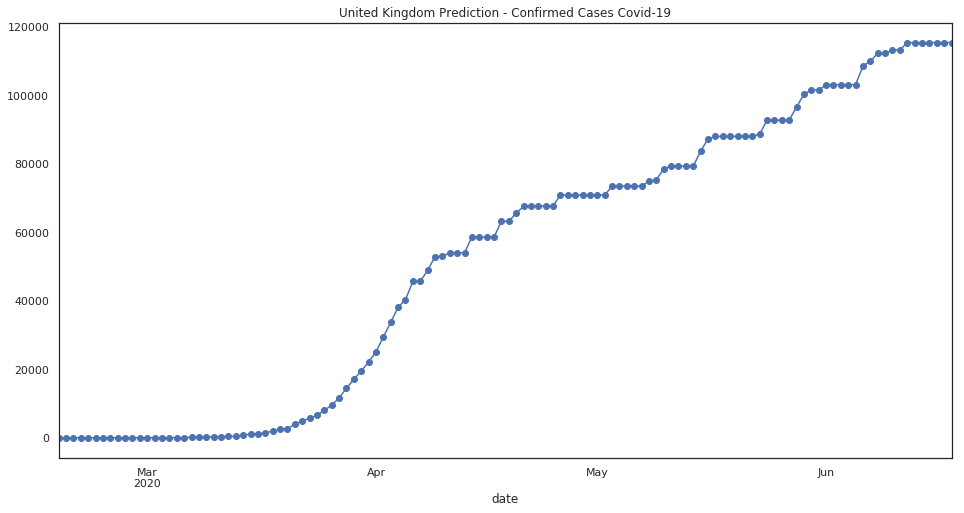

In [80]:
p8=pred['United Kingdom_nan']
p8[2:].plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

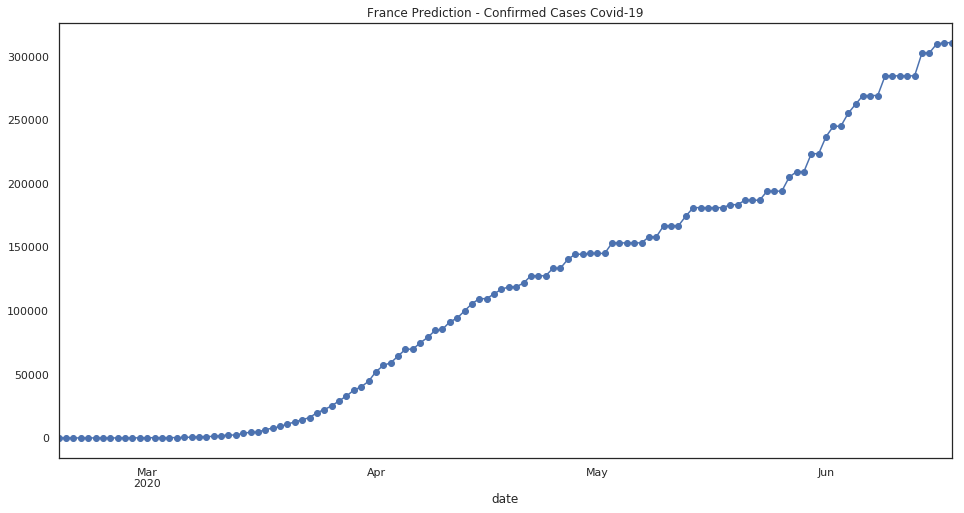

In [81]:
p9=pred['France_nan']
p9[2:].plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

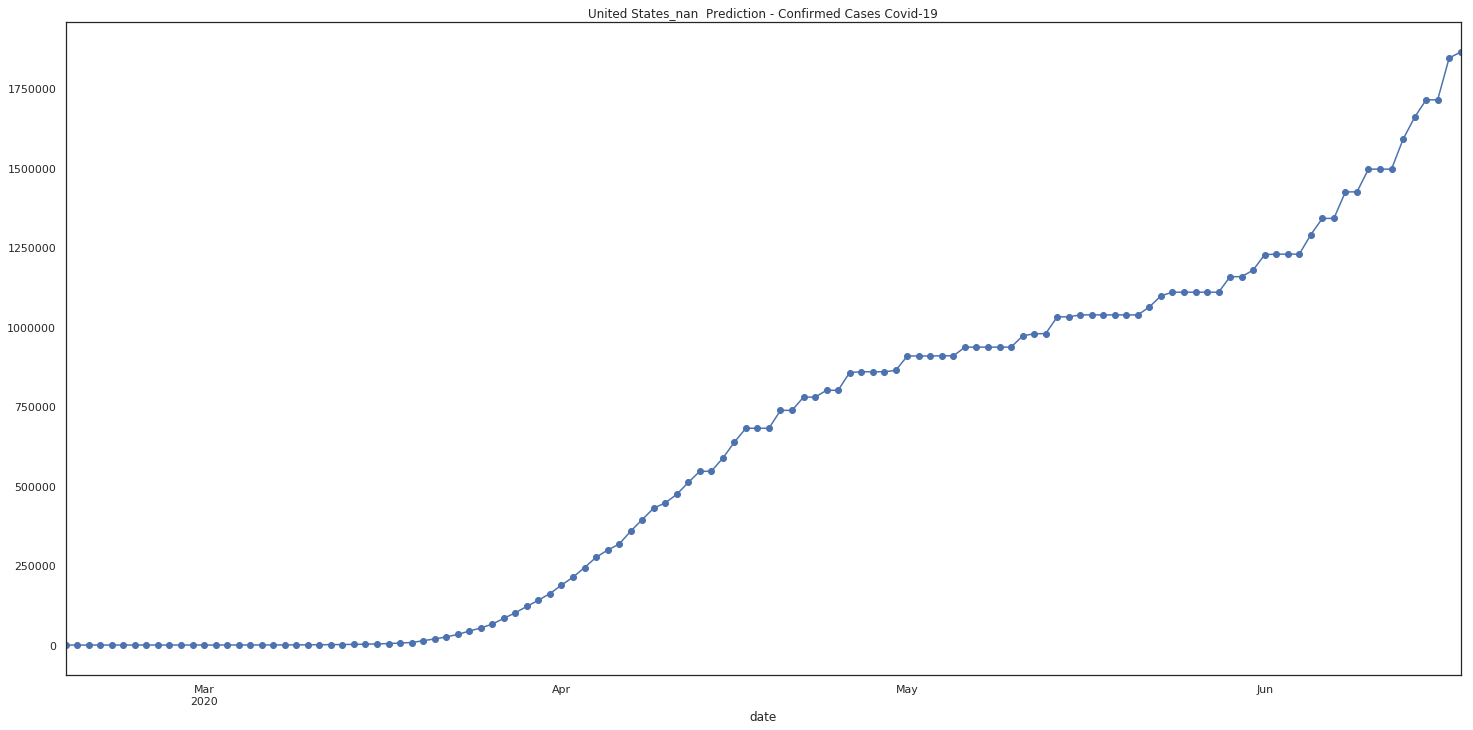

In [82]:
p10=pred['United States_nan']
p10[2:].plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

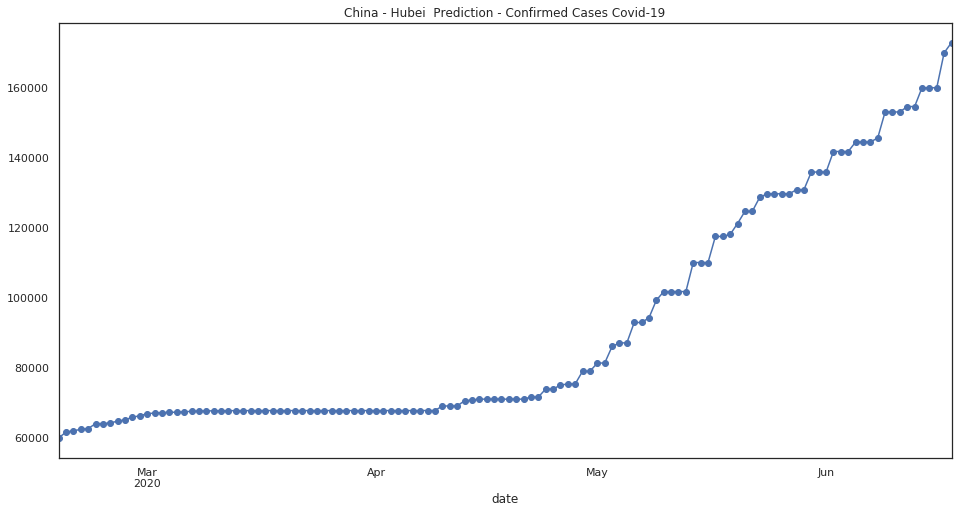

In [83]:
p11=pred['China_Hubei']
p11[2:].plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

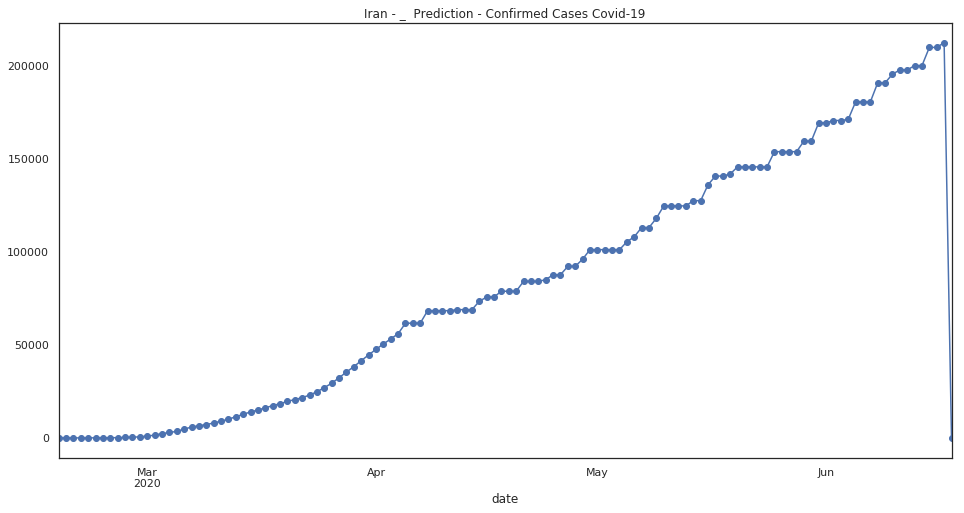

In [84]:
p12=pred['Iran_nan']
p12[2:].plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

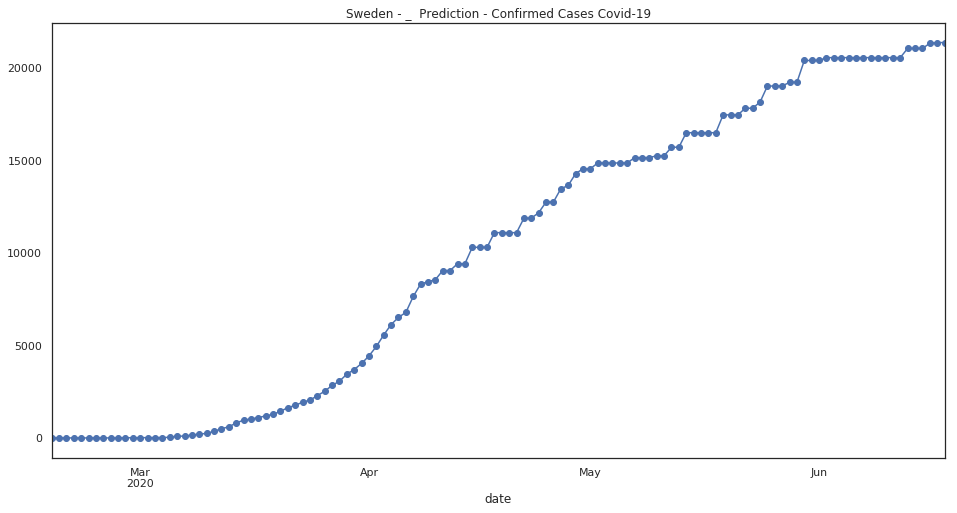

In [85]:
p13=pred['Sweden_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

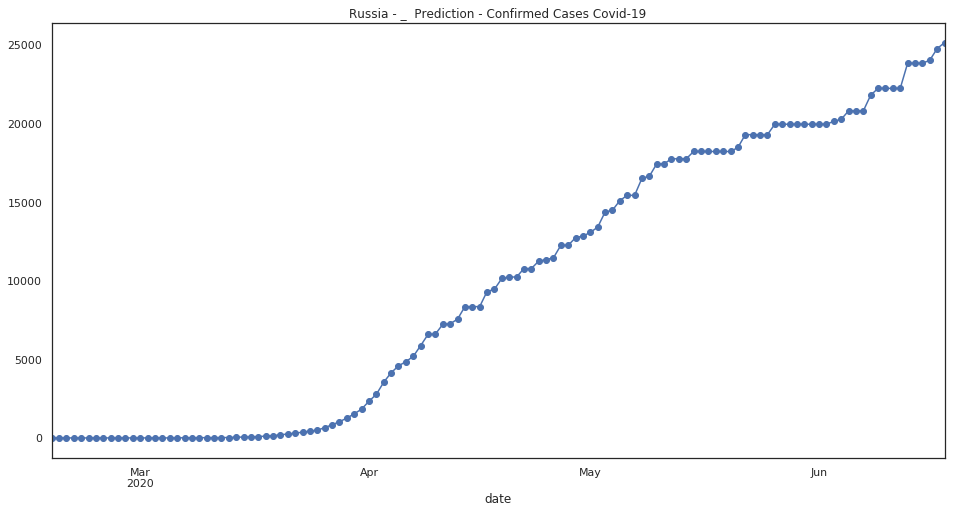

In [86]:
p13=pred['Russia_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

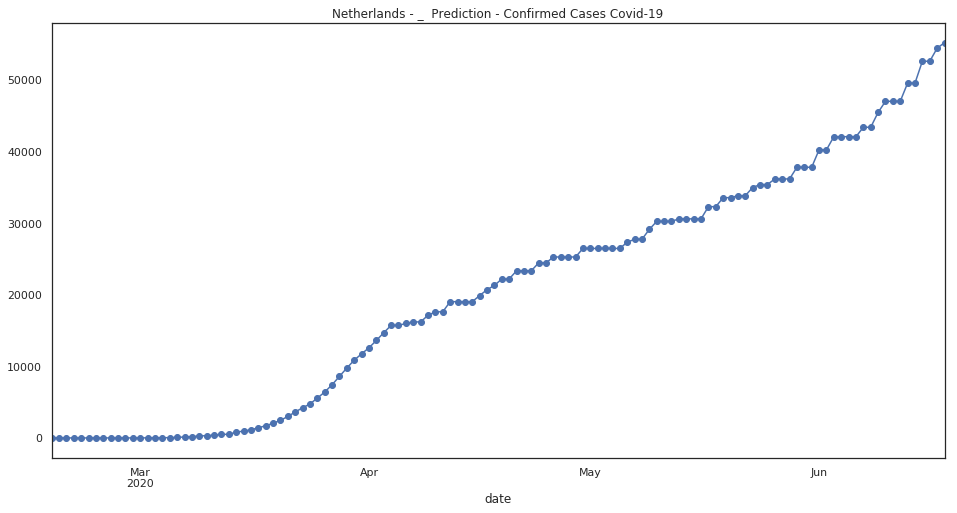

In [87]:
p14=pred['Netherlands_nan']
p14[2:].plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

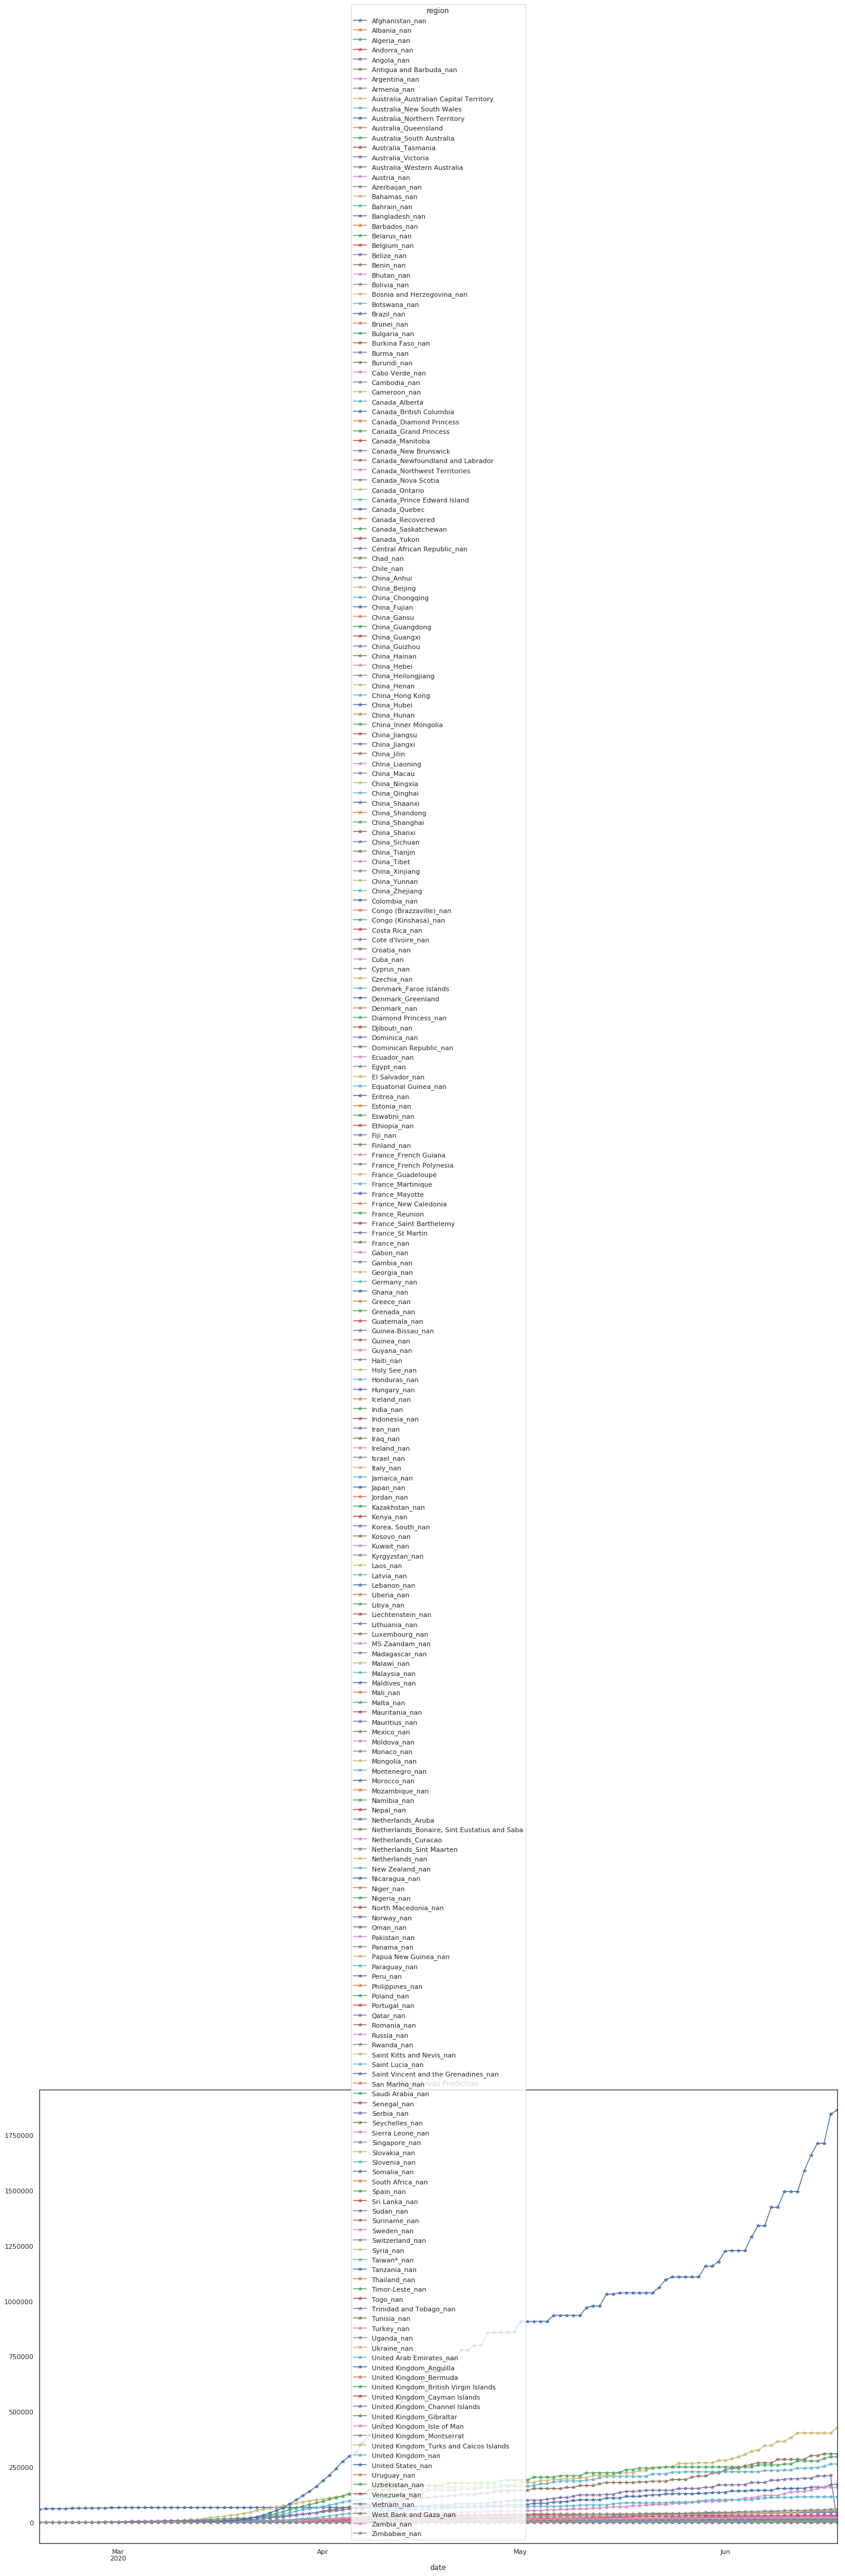

In [88]:
#region=my_train_list
pv2=pred
pv2[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [89]:
pv1=pv2[2:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [90]:
p[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-18              0.0          0.0          0.0          0.0   
2020-02-19              0.0          0.0          0.0          0.0   
2020-02-20              0.0          0.0          0.0          0.0   
2020-02-21              0.0          0.0          0.0          0.0   
2020-02-22              0.0          0.0          0.0          0.0   
2020-02-23              0.0          0.0          0.0          0.0   
2020-02-24              0.0          0.0          0.0          0.0   
2020-02-25              1.0          0.0          1.0          0.0   
2020-02-26              1.0          0.0          1.0          0.0   
2020-02-27              1.0          0.0          1.0          0.0   
2020-02-28              1.0          0.0          1.0          0.0   
2020-02-29              1.0          0.0          1.0          0.0   
2020-03-01              1.0          0.0          1.0          0.0   
2020-03-02              1.0          0.0          1.0          0.0   
2020-03-03              1.0          0.0          3.0          1.0   
2020-03-04              1.0          0.0          5.0          1.0   
2020-03-05              1.0          0.0         12.0          1.0   
2020-03-06              1.0          0.0         12.0          1.0   
2020-03-07              1.0          0.0         17.0          1.0   
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
...                     ...          ...          ...          ...   
2020-05-20            915.0        835.0       2941.0        955.0   
2020-05-21            947.0        835.0       2941.0        955.0   
2020-05-22            962.0        860.0       2960.0        955.0   
2020-05-23           1007.0        860.0       3061.0        975.0   
2020-05-24           1007.0        860.0       3061.0        975.0   
2020-05-25           1083.0        860.0       3061.0        975.0   
2020-05-26           1083.0        874.0       3061.0        975.0   
2020-05-27           1083.0        874.0       3061.0        989.0   
2020-05-28           1083.0        874.0       3061.0       1017.0   
2020-05-29           1097.0        874.0       3093.0       1017.0   
2020-05-30           1177.0        874.0       3093.0       1017.0   
2020-05-31           1177.0        874.0       3175.0       1062.0   
2020-06-01           1177.0        897.0       3175.0       1062.0   
2020-06-02           1179.0        932.0       3175.0       1070.0   
2020-06-03           1236.0        932.0       3272.0       1070.0   
2020-06-04           1236.0        933.0       3382.0       1070.0   
2020-06-05           1287.0        933.0       3382.0       1135.0   
2020-06-06           1293.0        970.0       3382.0       1135.0   
2020-06-07           1317.0        970.0       3382.0       1139.0   
2020-06-08           1341.0        970.0       3418.0       1139.0   
2020-06-09           1341.0        970.0       3418.0       1167.0   
2020-06-10           1341.0        970.0       3503.0       1167.0   
2020-06-11           1341.0        970.0       3503.0       1167.0   
2020-06-12           1341.0        970.0       3503.0       1167.0   
2020-06-13

In [91]:

#pip install gmplot

In [92]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [93]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [94]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [95]:
heatmap_m[:]

region      Lat      Long  2020-02-18 00:00:00  \
0   Australia_New South Wales -33.8688  151.2093                  4.0   
1                 Belgium_nan  50.8333    4.0000                  1.0   
2             China_Hong Kong  22.3000  114.2000                 60.0   
3                 China_Hubei  30.9756  112.2707              59989.0   
4                 China_Macau  22.1667  113.5500                 10.0   
5                  France_nan  46.2276    2.2137                 12.0   
6                 Germany_nan  51.0000    9.0000                 16.0   
7                   India_nan  21.0000   78.0000                  3.0   
8                    Iran_nan  32.0000   53.0000                  0.0   
9                    Iran_nan  32.0000   53.0000                  0.0   
10                  Italy_nan  43.0000   12.0000                  3.0   
11           Korea, South_nan  36.0000  128.0000                 30.0   
12            Netherlands_nan  52.1326    5.2913                  0.0   
13                 Poland_nan  51.9194   19.1451                  0.0   
14               Portugal_nan  39.3999   -8.2245                  0.0   
15                 Russia_nan  60.0000   90.0000                  2.0   
16              Singapore_nan   1.2833  103.8333                 77.0   
17                  Spain_nan  40.0000   -4.0000                  2.0   
18                 Sweden_nan  63.0000   16.0000                  1.0   
19            Switzerland_nan  46.8182    8.2275                  0.0   
20                Taiwan*_nan  23.7000  121.0000                 22.0   
21                 Turkey_nan  38.9637   35.2433                  0.0   
22         United Kingdom_nan  55.3781   -3.4360                  9.0   
23          United States_nan  37.0902  -95.7129                 13.0   

    2020-02-19 00:00:00  2020-02-20 00:00:00  2020-02-21 00:00:00  \
0                   4.0                  4.0                  4.0   
1                   1.0                  1.0                  1.0   
2                  62.0                 63.0                 68.0   
3               61682.0              62031.0              62442.0   
4                  10.0                 10.0                 10.0   
5                  12.0                 12.0                 12.0   
6                  16.0                 16.0                 16.0   
7                   3.0                  3.0                  3.0   
8                   2.0                  5.0                 18.0   
9                   2.0                  5.0                 18.0   
10                  3.0                  3.0                  3.0   
11                 31.0                 31.0                104.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  2.0                  2.0                  2.0   
16                 81.0                 84.0                 84.0   
17                  2.0                  2.0                  2.0   
18                  1.0                  1.0                  1.0   
19                  0.0                  0.0                  0.0   
20                 22.0                 23.0                 24.0   
21                  0.0                  0.0                  0.0   
22                  9.0                  9.0                  9.0   
23                 13.0                 13.0                 13.0   

    2020-02-22 00:00:00  2020-02-23 00:00:00  2020-02-24 00:00:00  ...  \
0                   4.0                  4.0                  4.0  ...   
1                   1.0                  1.0                  1.0  ...   
2                  68.0                 69.0                 74.0  ...   
3               62662.0              64084.0              64084.0  ...   
4                  10.0                 10.0                 10.0  ...   
5                  12.0    

In [96]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-1
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [97]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [98]:
print("Stats and Forecast Done for Today!")
print("I'm done with this month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [99]:
exit()

H2O session _sid_920f closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
